# **Importing libraries and reading the CSV_file**

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [3]:
df=pd.read_csv('/content/cumulative.csv.zip')

In [ ]:
df.count()

,0
rowid,9564
kepid,9564
kepoi_name,9564
kepler_name,2294
koi_disposition,9564
koi_pdisposition,9564
koi_score,8054
koi_fpflag_nt,9564
koi_fpflag_ss,9564
koi_fpflag_co,9564


In [ ]:
df.isnull().mean()*100 #Having a look at percentage of missing values

,0
rowid,0.000000
kepid,0.000000
kepoi_name,0.000000
kepler_name,76.014220
koi_disposition,0.000000
koi_pdisposition,0.000000
koi_score,15.788373
koi_fpflag_nt,0.000000
koi_fpflag_ss,0.000000
koi_fpflag_co,0.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9564 entries, 0 to 9563
Data columns (total 50 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   rowid              9564 non-null   int64  
 1   kepid              9564 non-null   int64  
 2   kepoi_name         9564 non-null   object 
 3   kepler_name        2294 non-null   object 
 4   koi_disposition    9564 non-null   object 
 5   koi_pdisposition   9564 non-null   object 
 6   koi_score          8054 non-null   float64
 7   koi_fpflag_nt      9564 non-null   int64  
 8   koi_fpflag_ss      9564 non-null   int64  
 9   koi_fpflag_co      9564 non-null   int64  
 10  koi_fpflag_ec      9564 non-null   int64  
 11  koi_period         9564 non-null   float64
 12  koi_period_err1    9110 non-null   float64
 13  koi_period_err2    9110 non-null   float64
 14  koi_time0bk        9564 non-null   float64
 15  koi_time0bk_err1   9110 non-null   float64
 16  koi_time0bk_err2   9110 

# Dropping columns with more than 30% missing values


1.   Kepler_name(76% values missing)
2.   Koi_teq_err1(100% values missing)

1.   koi_teq_err2(100% values missing)






In [5]:
df=df.drop(['kepler_name','koi_teq_err1','koi_teq_err2'], axis=1)

# **Univariate Analysis on Numerical columns**


1.   Plotting histogram for all the columns at one go
2.   Plotting histogram and boxplot for certain columns to have a closer look
**Conclusions**


*   Lot of the numerical columns have outliers
*   Columns with no outliers are ra,dec




In [ ]:
num_col=['koi_period',
'koi_time0bk',
'koi_impact',
'koi_score',
'koi_duration',
'koi_depth',
'koi_prad',
'koi_teq',
'koi_insol',
'koi_model_snr',
'koi_steff',
'koi_slogg',
'koi_srad',
'ra',
'dec',
'koi_kepmag']
df[num_col].describe()

,koi_period,koi_time0bk,koi_impact,koi_score,koi_duration,koi_depth,koi_prad,koi_teq,koi_insol,koi_model_snr,koi_steff,koi_slogg,koi_srad,ra,dec,koi_kepmag
count,9564.000000,9564.000000,9564.000000,9564.000000,9564.000000,9.564000e+03,9564.000000,9564.000000,9.564000e+03,9564.000000,9564.00000,9564.000000,9564.000000,9564.000000,9564.000000,9564.000000
mean,75.671358,166.183251,0.735105,0.480829,5.621606,2.379134e+04,102.891778,1085.385828,7.745737e+03,259.895001,5706.82328,4.310157,1.728712,292.060163,43.810433,14.264606
std,1334.744046,67.918960,3.284658,0.437658,6.471554,8.066667e+04,3018.662296,839.940895,1.565099e+05,780.556564,781.58775,0.424316,6.009769,4.766657,3.601243,1.385376
min,0.241843,120.515914,0.000000,0.000000,0.052000,0.000000e+00,0.080000,25.000000,0.000000e+00,0.000000,2661.00000,0.047000,0.109000,279.852720,36.577381,6.966000
25%,2.733684,132.761718,0.209075,0.000000,2.437750,1.668000e+02,1.430000,553.000000,2.216000e+01,12.300000,5333.00000,4.232750,0.835750,288.660770,40.777173,13.440000
50%,9.752831,137.224595,0.566000,0.480829,3.792600,4.537000e+02,2.490000,906.000000,1.583200e+02,24.500000,5745.00000,4.432000,1.006500,292.261125,43.677504,14.520000
75%,40.715178,170.694603,0.877000,0.995000,6.276500,2.125325e+03,21.712500,1352.500000,1.110257e+03,101.100000,6099.00000,4.539000,1.435250,295.859160,46.714611,15.322000
max,129995.778400,1472.522306,100.806000,1.000000,138.540000,1.541400e+06,200346.000000,14667.000000,1.094755e+07,9054.700000,15896.00000,5.364000,229.908000,301.720760,52.336010,20.003000


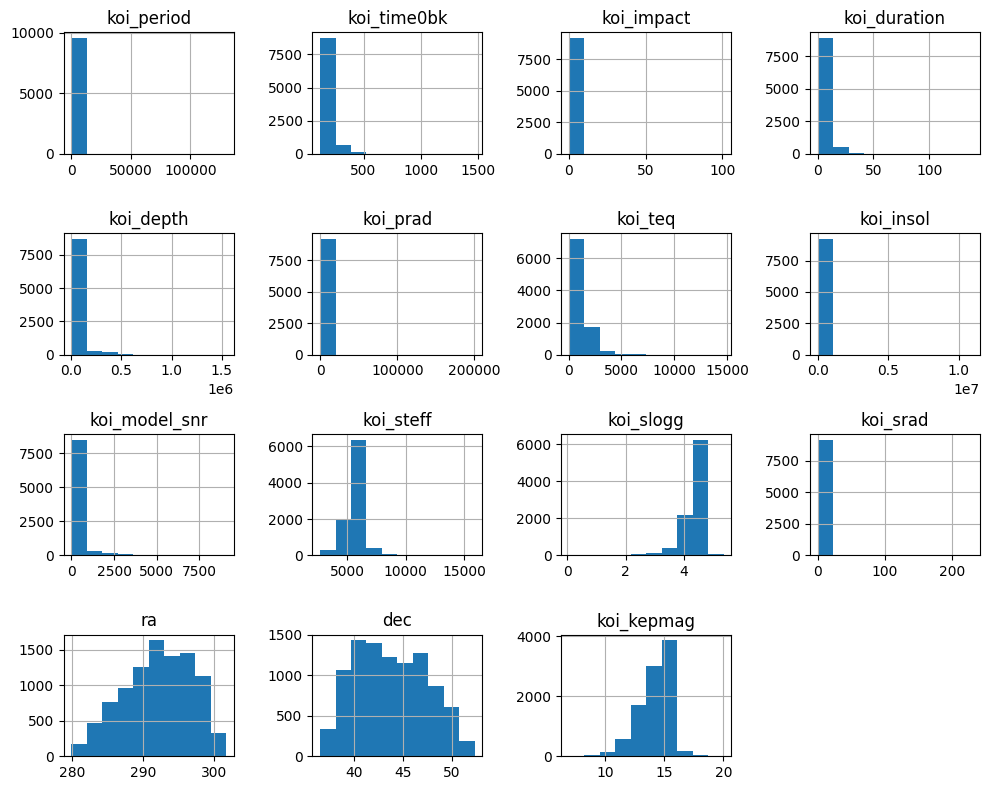

In [ ]:
num_col=['koi_period',
'koi_time0bk',
'koi_impact',
'koi_duration',
'koi_depth',
'koi_prad',
'koi_teq',
'koi_insol',
'koi_model_snr',
'koi_steff',
'koi_slogg',
'koi_srad',
'ra',
'dec',
'koi_kepmag']
df[num_col].hist(bins=10,figsize=(10,8))
plt.tight_layout()
plt.show()

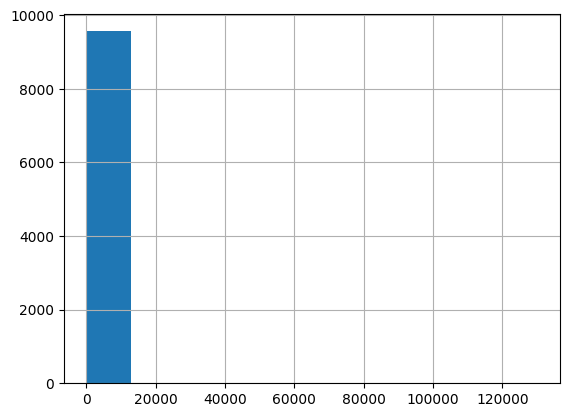

In [ ]:
#Plotting individual graph for certain column for a closer look
df['koi_period'].hist(bins=10)
plt.show()

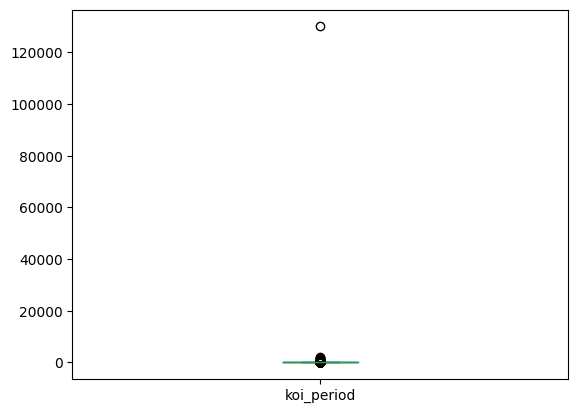

In [ ]:
df['koi_period'].plot(kind='box')
plt.show()

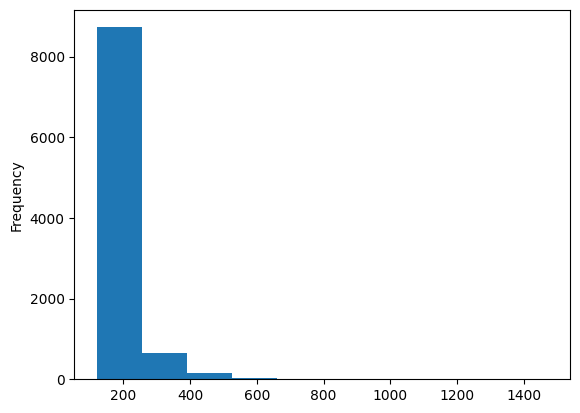

In [ ]:
df['koi_time0bk'].plot(kind='hist')
plt.show()

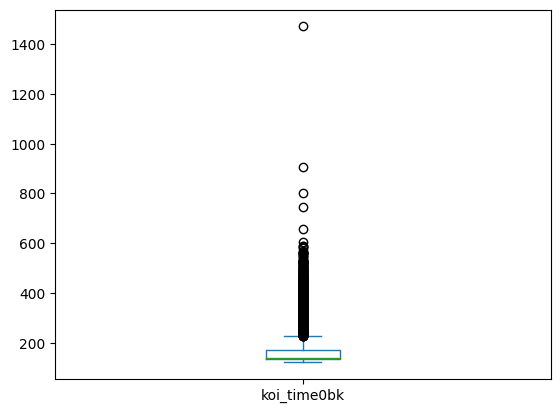

In [ ]:
df['koi_time0bk'].plot(kind='box')
plt.show()
#There are outliers

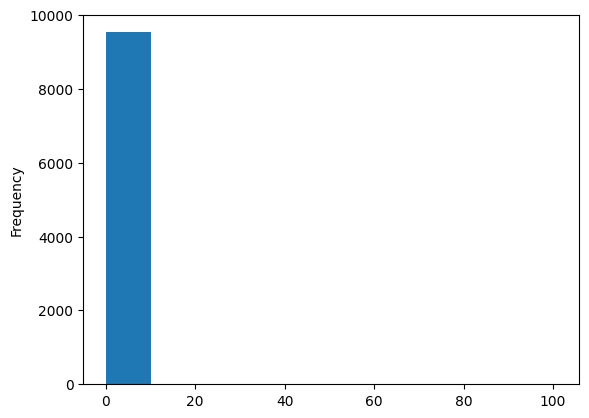

In [ ]:
df['koi_impact'].plot(kind='hist')
plt.show()

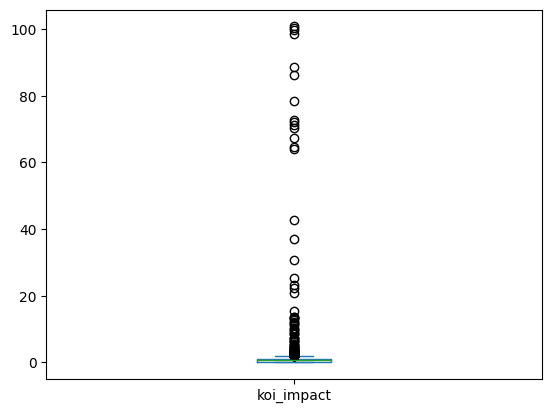

In [ ]:
df['koi_impact'].plot(kind='box')
plt.show()

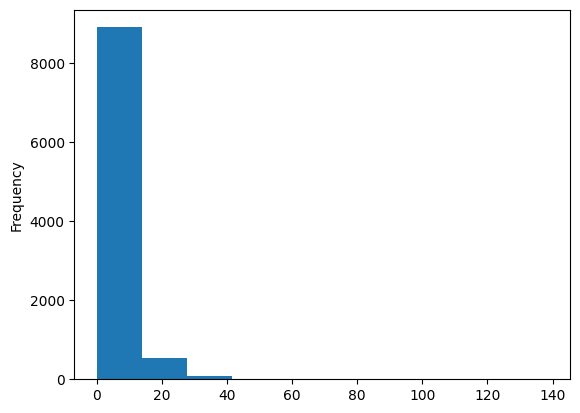

In [ ]:
df['koi_duration'].plot(kind='hist')
plt.show()

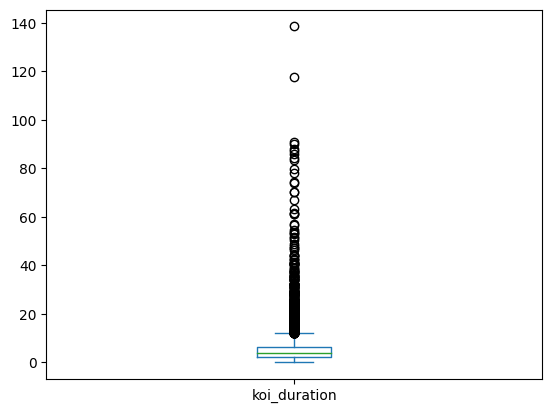

In [ ]:
df['koi_duration'].plot(kind='box')
plt.show()

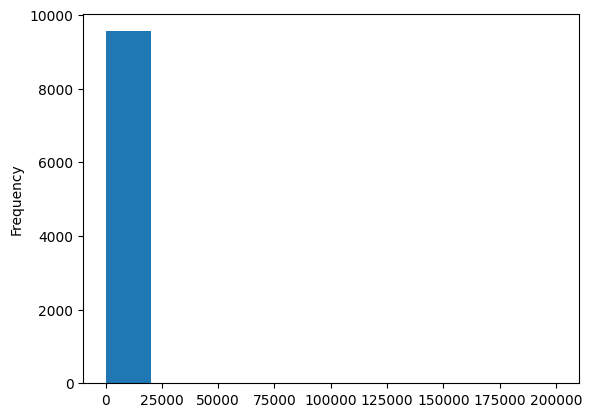

In [ ]:
df['koi_prad'].plot(kind='hist')
plt.show()

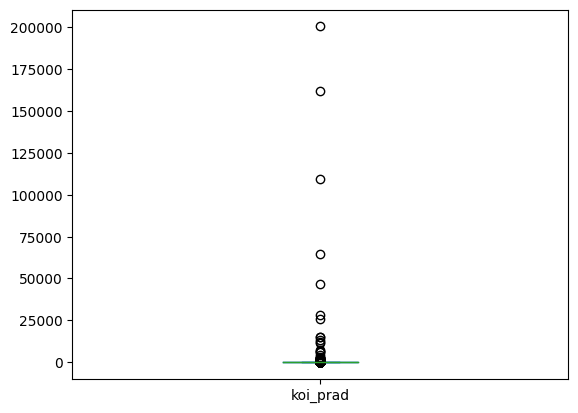

In [ ]:
df['koi_prad'].plot(kind='box')
plt.show()

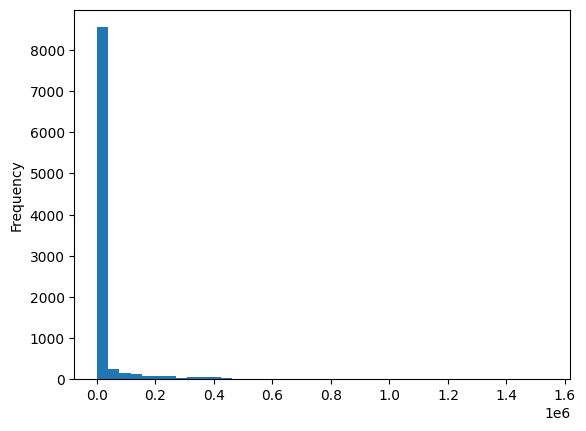

In [ ]:
df['koi_depth'].plot(kind='hist', bins=40)
plt.show()

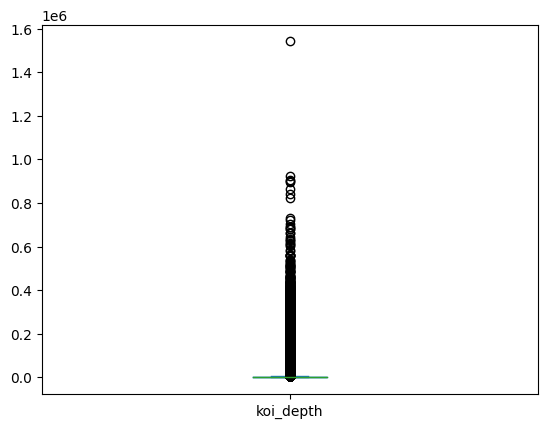

In [ ]:
df['koi_depth'].plot(kind='box')
plt.show()

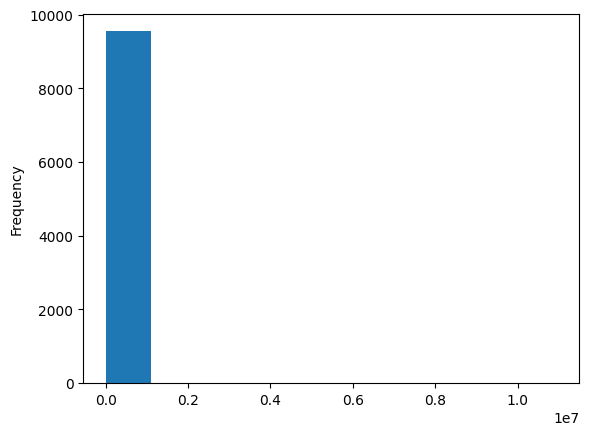

In [ ]:
df['koi_insol'].plot(kind='hist')
plt.show()

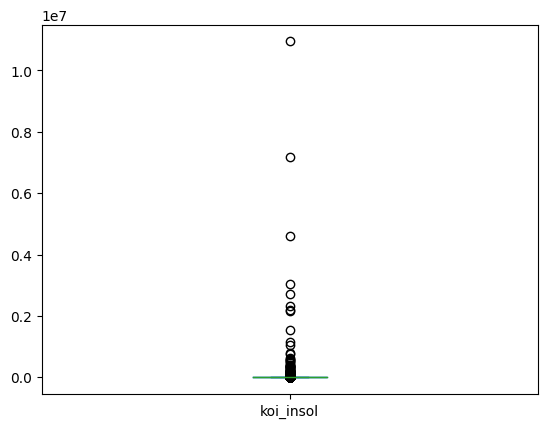

In [ ]:
df['koi_insol'].plot(kind='box')
plt.show()

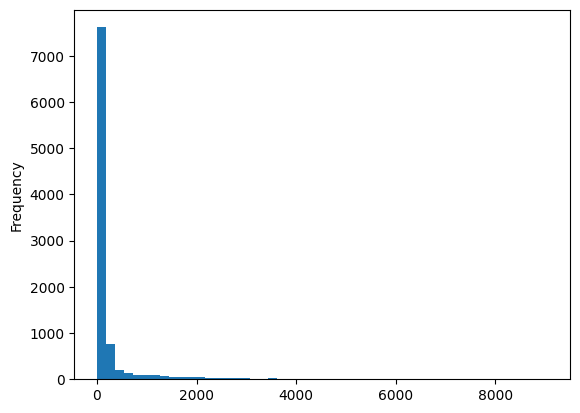

In [ ]:
df['koi_model_snr'].plot(kind='hist',bins=50)
plt.show()

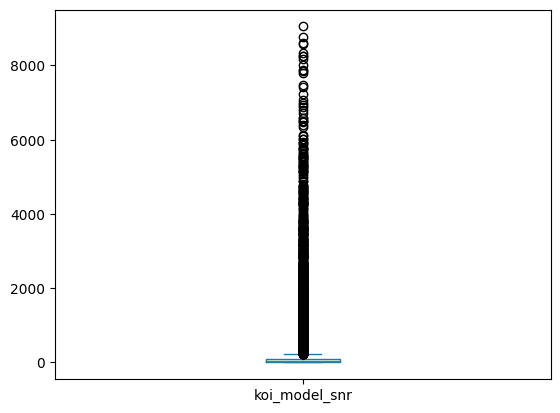

In [ ]:
df['koi_model_snr'].plot(kind='box')
plt.show()

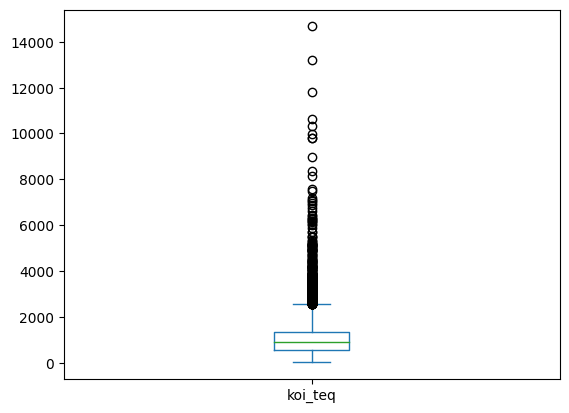

In [ ]:
#Plotting box plots for the remaining columns
df['koi_teq'].plot(kind='box')
plt.show()

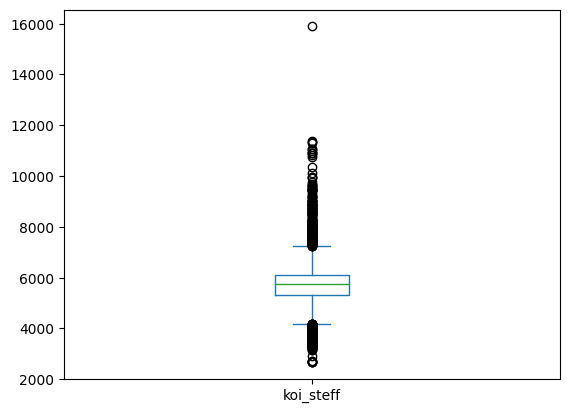

In [ ]:
df['koi_steff'].plot(kind='box')
plt.show()

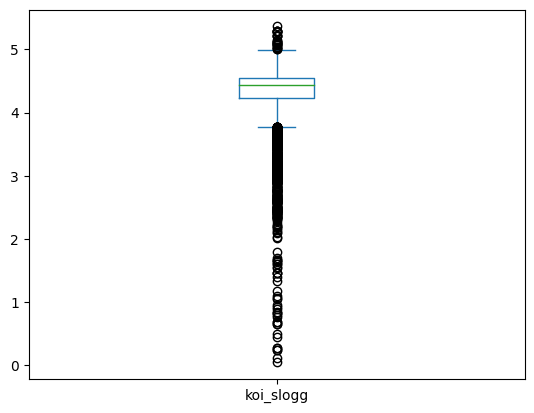

In [ ]:
df['koi_slogg'].plot(kind='box')
plt.show()

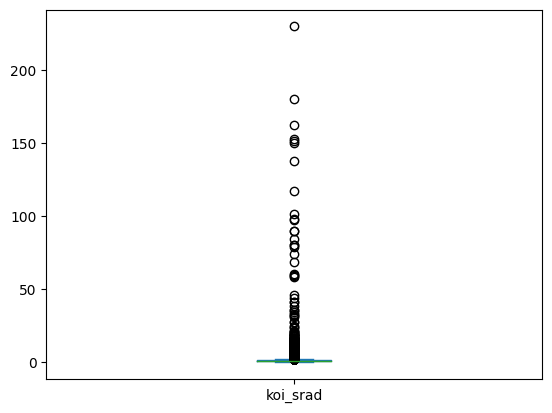

In [ ]:
df['koi_srad'].plot(kind='box')
plt.show()

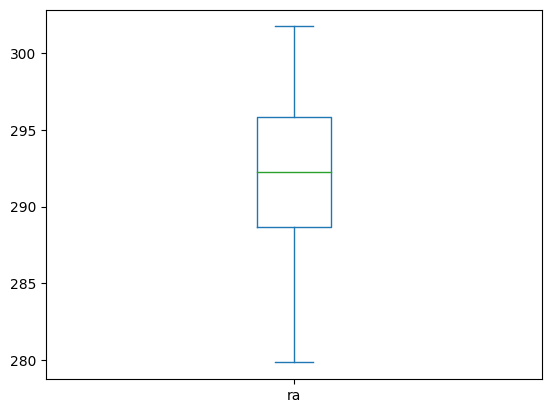

In [ ]:
df['ra'].plot(kind='box')
plt.show()

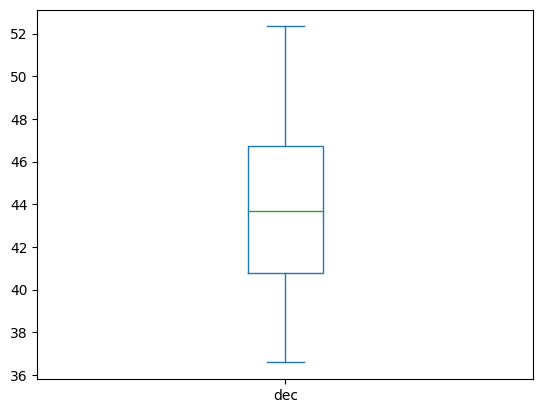

In [ ]:
df['dec'].plot(kind='box')
plt.show()

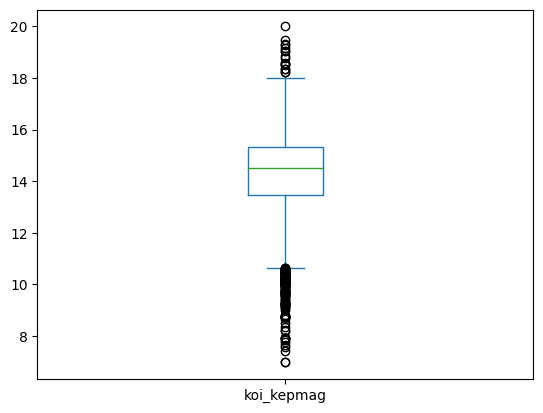

In [ ]:
df['koi_kepmag'].plot(kind='box')
plt.show()

<Axes: ylabel='Frequency'>

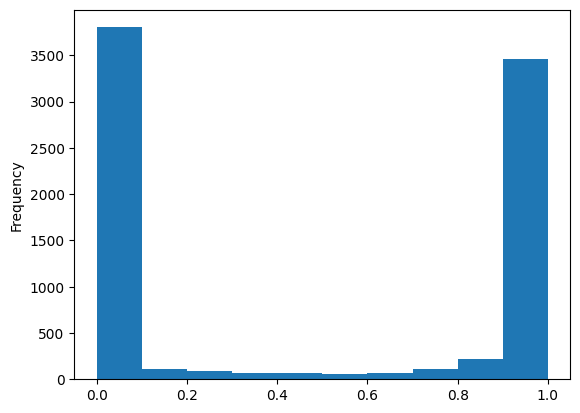

In [ ]:
df['koi_score'].plot(kind='hist')

<Axes: >

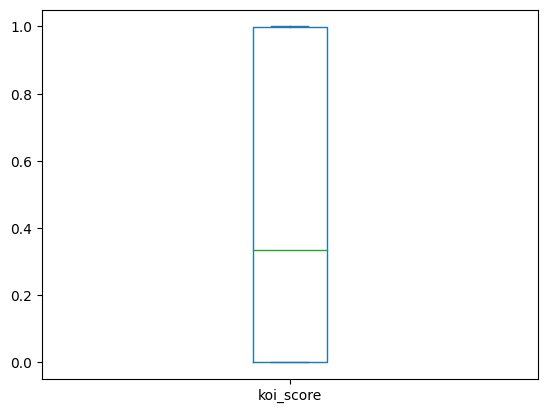

In [ ]:
df['koi_score'].plot(kind='box')

# **Handling Missing values of numerical columns**


*   Filled up the missing values using mean method



In [6]:
num_col=['koi_period',
'koi_time0bk',
'koi_impact',
'koi_score',
'koi_duration',
'koi_depth',
'koi_prad',
'koi_teq',
'koi_insol',
'koi_model_snr',
'koi_steff',
'koi_slogg',
'koi_srad',
'ra',
'dec',
'koi_kepmag']
df[num_col]=df[num_col].fillna(df[num_col].mean())
df.isnull().sum()

,0
rowid,0
kepid,0
kepoi_name,0
koi_disposition,0
koi_pdisposition,0
koi_score,0
koi_fpflag_nt,0
koi_fpflag_ss,0
koi_fpflag_co,0
koi_fpflag_ec,0


# **Handling Outliers Part 1**

*   Method used for handling outliers is Percentile and IQR method


In [7]:
lmt25=df['koi_period'].quantile(0.25)
lmt75=df['koi_period'].quantile(0.75)
iqr=lmt75-lmt25
upper_lmt=lmt75+1.5*iqr
lower_lmt=lmt25-1.5*iqr

In [8]:
df['koi_period']=np.where(
    df['koi_period']>upper_lmt,
    upper_lmt,
    np.where(
        df['koi_period']<lower_lmt,
        lower_lmt,
        df['koi_period']
    )
)

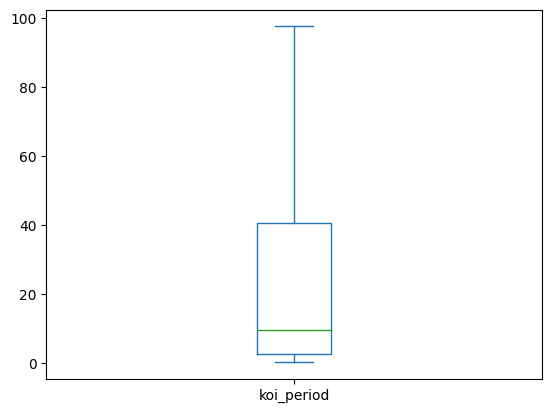

In [9]:
df['koi_period'].plot(kind='box')
plt.show()

In [10]:
lmt25=df['koi_time0bk'].quantile(0.25)
lmt75=df['koi_time0bk'].quantile(0.75)
iqr=lmt75-lmt25
upper_lmt=lmt75+1.5*iqr
lower_lmt=lmt25-1.5*iqr

In [11]:
df['koi_time0bk']=np.where(
    df['koi_time0bk']>upper_lmt,
    upper_lmt,
    np.where(
        df['koi_time0bk']<lower_lmt,
        lower_lmt,
        df['koi_time0bk']
    )
)

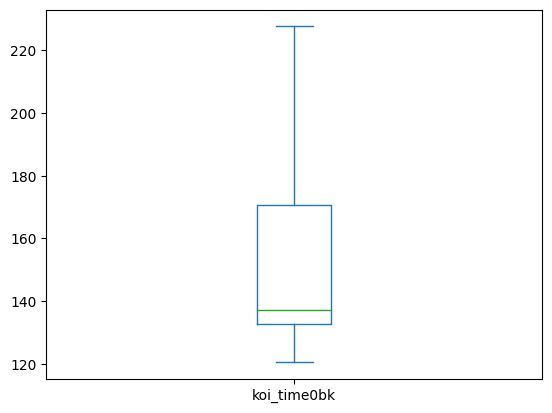

In [12]:
df['koi_time0bk'].plot(kind='box')
plt.show()

In [13]:
df['koi_time0bk'].describe()

,koi_time0bk
count,9564.000000
mean,154.779769
std,31.861336
min,120.515914
25%,132.761718
50%,137.224595
75%,170.694603
max,227.593932


In [14]:
lmt25=df['koi_impact'].quantile(0.25)
lmt75=df['koi_impact'].quantile(0.75)
iqr=lmt75-lmt25
upper_lmt=lmt75+1.5*iqr
lower_lmt=lmt25-1.5*iqr

In [15]:
df['koi_impact']=np.where(
    df['koi_impact']>upper_lmt,
    upper_lmt,
    np.where(
        df['koi_impact']<lower_lmt,
        lower_lmt,
        df['koi_impact']
    )
)

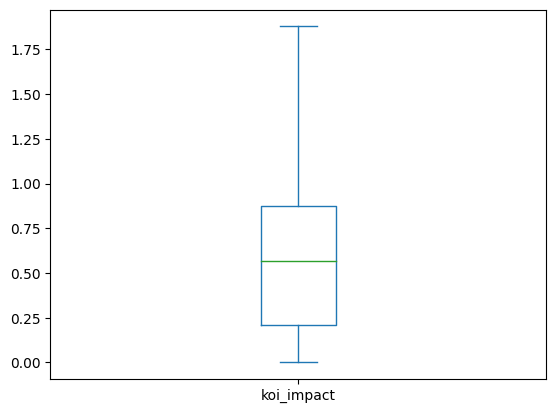

In [16]:
df['koi_impact'].plot(kind='box')
plt.show()

In [17]:
df['koi_impact'].describe()

,koi_impact
count,9564.000000
mean,0.573425
std,0.406130
min,0.000000
25%,0.209075
50%,0.566000
75%,0.877000
max,1.878888


In [18]:
lmt1=df['koi_duration'].quantile(0.25)
lmt2=df['koi_duration'].quantile(0.75)
iqr=lmt2-lmt1
upper_lmt=lmt2+1.5*iqr
lower_lmt=lmt1-1.5*iqr

In [19]:
df['koi_duration']=np.where(
    df['koi_duration']>upper_lmt,
    upper_lmt,
    np.where(
        df['koi_duration']<lower_lmt,
        lower_lmt,
        df['koi_duration']
    )
)

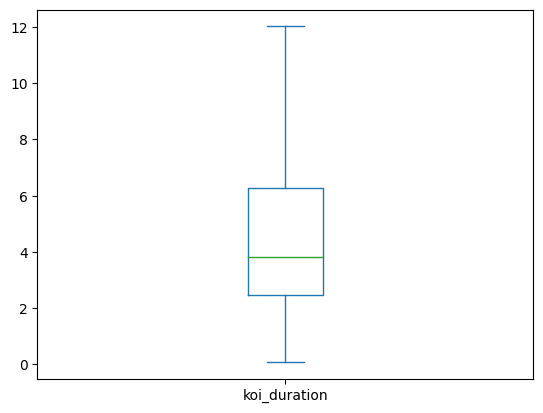

In [20]:
df['koi_duration'].plot(kind='box')
plt.show()

In [21]:
df['koi_duration'].describe()

,koi_duration
count,9564.000000
mean,4.841954
std,3.252243
min,0.052000
25%,2.437750
50%,3.792600
75%,6.276500
max,12.034625


In [22]:
lmt1=df['koi_depth'].quantile(0.25)
lmt2=df['koi_depth'].quantile(0.75)
iqr=lmt2-lmt1
upper_lmt=lmt2+1.5*iqr
lower_lmt=lmt1-1.5*iqr

In [23]:
df['koi_depth']=np.where(
    df['koi_depth']>upper_lmt,
    upper_lmt,
    np.where(
        df['koi_depth']<lower_lmt,
        lower_lmt,
        df['koi_depth']
    )
)

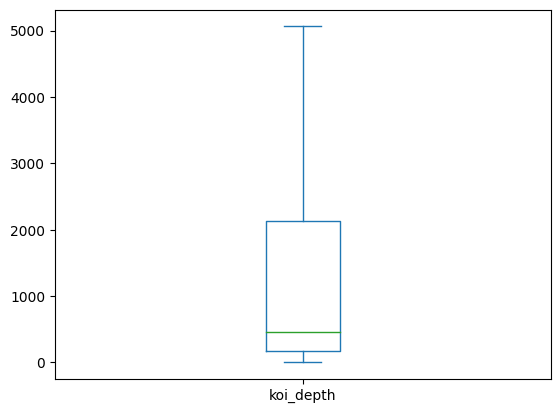

In [24]:
df['koi_depth'].plot(kind='box')
plt.show()

In [25]:
df['koi_depth'].describe()

,koi_depth
count,9564.000000
mean,1516.978286
std,1957.051325
min,0.000000
25%,166.800000
50%,453.700000
75%,2125.325000
max,5063.112500


In [26]:
lmt1=df['koi_prad'].quantile(0.25)
lmt2=df['koi_prad'].quantile(0.75)
iqr=lmt2-lmt1
upper_lmt=lmt2+1.5*iqr
lower_lmt=lmt1-1.5*iqr

In [27]:
df['koi_prad']=np.where(
    df['koi_prad']>upper_lmt,
    upper_lmt,
    np.where(
        df['koi_prad']<lower_lmt,
        lower_lmt,
        df['koi_prad']
    )
)

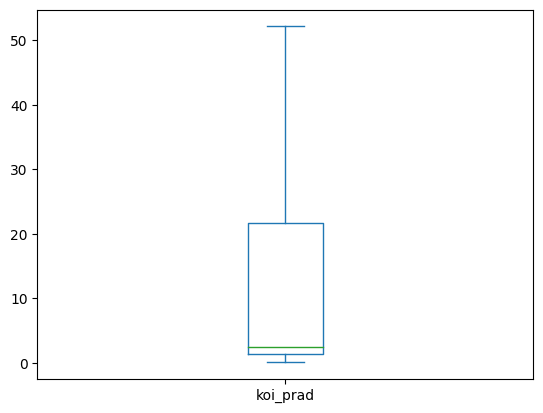

In [28]:
df['koi_prad'].plot(kind='box')
plt.show()

In [29]:
df['koi_prad'].describe()

,koi_prad
count,9564.000000
mean,13.539294
std,18.931251
min,0.080000
25%,1.430000
50%,2.490000
75%,21.712500
max,52.136250


In [30]:
lmt1=df['koi_teq'].quantile(0.25)
lmt2=df['koi_teq'].quantile(0.75)
iqr=lmt2-lmt1
upper_lmt=lmt2+1.5*iqr
lower_lmt=lmt1-1.5*iqr

In [31]:
df['koi_teq']=np.where(
    df['koi_teq']>upper_lmt,
    upper_lmt,
    np.where(
        df['koi_teq']<lower_lmt,
        lower_lmt,
        df['koi_teq']
    )
)

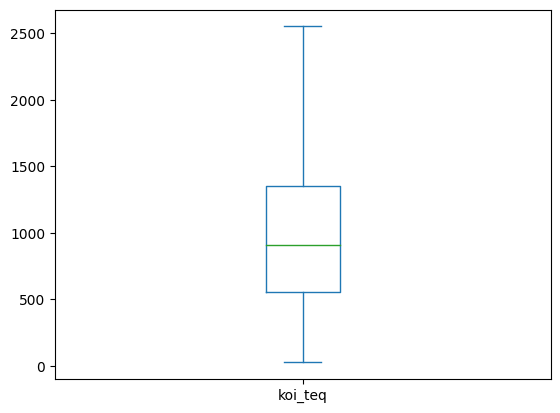

In [32]:
df['koi_teq'].plot(kind='box')
plt.show()

In [33]:
df['koi_teq'].describe()

,koi_teq
count,9564.000000
mean,1034.182931
std,626.519828
min,25.000000
25%,553.000000
50%,906.000000
75%,1352.500000
max,2551.750000


In [34]:
lmt1=df['koi_insol'].quantile(0.25)
lmt2=df['koi_insol'].quantile(0.75)
iqr=lmt2-lmt1
upper_lmt=lmt2+1.5*iqr
lower_lmt=lmt1-1.5*iqr

In [35]:
df['koi_insol']=np.where(
    df['koi_insol']>upper_lmt,
    upper_lmt,
    np.where(
        df['koi_insol']<lower_lmt,
        lower_lmt,
        df['koi_insol']
    )
)

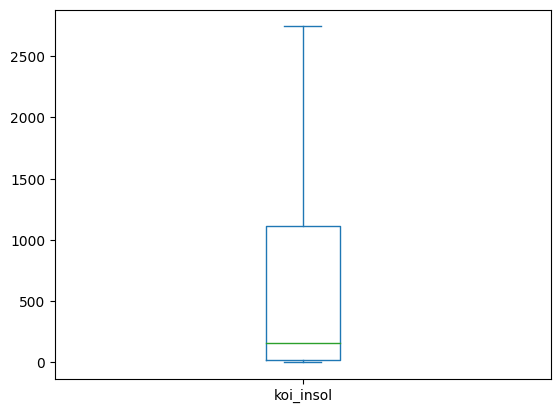

In [36]:
df['koi_insol'].plot(kind='box')
plt.show()

In [37]:
lmt1=df['koi_model_snr'].quantile(0.25)
lmt2=df['koi_model_snr'].quantile(0.75)
iqr=lmt2-lmt1
upper_lmt=lmt2+1.5*iqr
lower_lmt=lmt1-1.5*iqr

In [38]:
df['koi_model_snr']=np.where(
    df['koi_model_snr']>upper_lmt,
    upper_lmt,
    np.where(
        df['koi_model_snr']<lower_lmt,
        lower_lmt,
        df['koi_model_snr']
    )
)

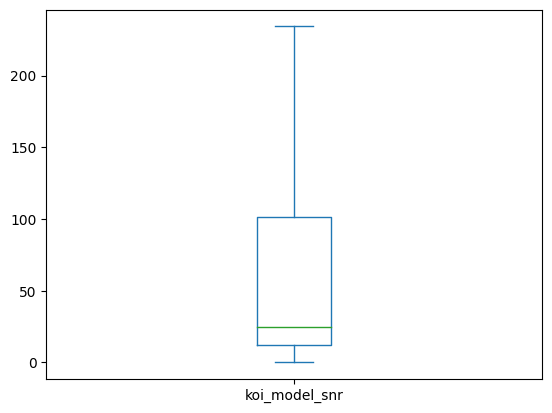

In [39]:
df['koi_model_snr'].plot(kind='box')
plt.show()

In [40]:
df['koi_model_snr'].describe()

,koi_model_snr
count,9564.000000
mean,71.944741
std,86.174448
min,0.000000
25%,12.300000
50%,24.500000
75%,101.100000
max,234.300000


In [41]:
lmt1=df['koi_steff'].quantile(0.25)
lmt2=df['koi_steff'].quantile(0.75)
iqr=lmt2-lmt1
upper_lmt=lmt2+1.5*iqr
lower_lmt=lmt1-1.5*iqr

In [42]:
df['koi_steff']=np.where(
    df['koi_steff']>upper_lmt,
    upper_lmt,
    np.where(
        df['koi_steff']<lower_lmt,
        lower_lmt,
        df['koi_steff']
    )
)

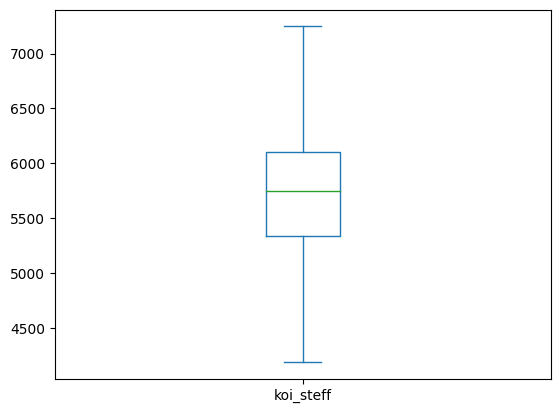

In [43]:
df['koi_steff'].plot(kind='box')
plt.show()

In [44]:
df['koi_steff'].describe()

,koi_steff
count,9564.000000
mean,5698.487646
std,647.799024
min,4184.000000
25%,5333.000000
50%,5745.000000
75%,6099.000000
max,7248.000000


In [45]:
lmt1=df['koi_slogg'].quantile(0.25)
lmt2=df['koi_slogg'].quantile(0.75)
iqr=lmt2-lmt1
upper_lmt=lmt2+1.5*iqr
lower_lmt=lmt1-1.5*iqr

In [46]:
df['koi_slogg']=np.where(
    df['koi_slogg']>upper_lmt,
    upper_lmt,
    np.where(
        df['koi_slogg']<lower_lmt,
        lower_lmt,
        df['koi_slogg']
    )
)

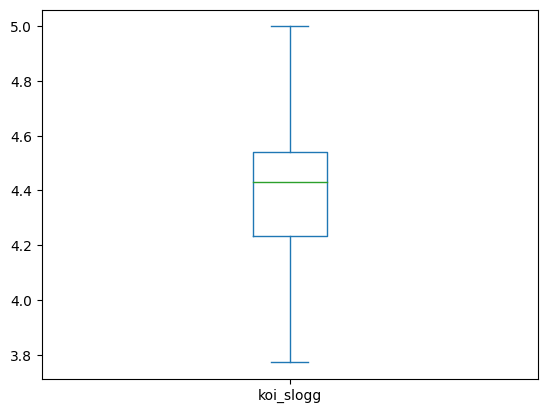

In [47]:
df['koi_slogg'].plot(kind='box')
plt.show()

In [48]:
df['koi_slogg'].describe()

,koi_slogg
count,9564.000000
mean,4.354030
std,0.262646
min,3.773375
25%,4.232750
50%,4.432000
75%,4.539000
max,4.998375


In [49]:
lmt1=df['koi_srad'].quantile(0.25)
lmt2=df['koi_srad'].quantile(0.75)
iqr=lmt2-lmt1
upper_lmt=lmt2+1.5*iqr
lower_lmt=lmt1-1.5*iqr

In [50]:
df['koi_srad']=np.where(
    df['koi_srad']>upper_lmt,
    upper_lmt,
    np.where(
        df['koi_srad']<lower_lmt,
        lower_lmt,
        df['koi_srad']
    )
)

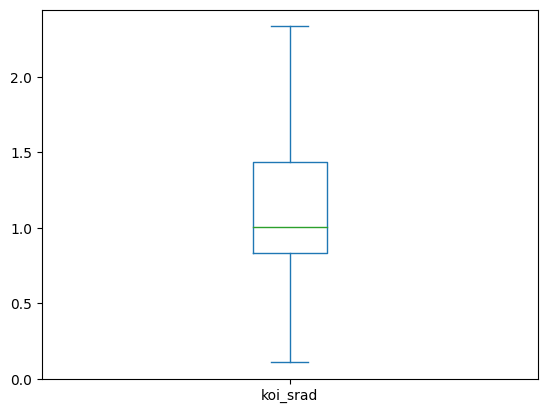

In [51]:
df['koi_srad'].plot(kind='box')
plt.show()

In [52]:
df['koi_srad'].describe()

,koi_srad
count,9564.000000
mean,1.187476
std,0.511403
min,0.109000
25%,0.835750
50%,1.006500
75%,1.435250
max,2.334500


In [53]:
lmt1=df['koi_kepmag'].quantile(0.01)
lmt2=df['koi_kepmag'].quantile(0.99)
iqr=lmt2-lmt1
upper_lmt=lmt2+1.5*iqr
lower_lmt=lmt1-1.5*iqr

In [54]:
df['koi_srad']=np.where(
    df['koi_srad']>upper_lmt,
    upper_lmt,
    np.where(
        df['koi_srad']<lower_lmt,
        lower_lmt,
        df['koi_srad']
    )
)

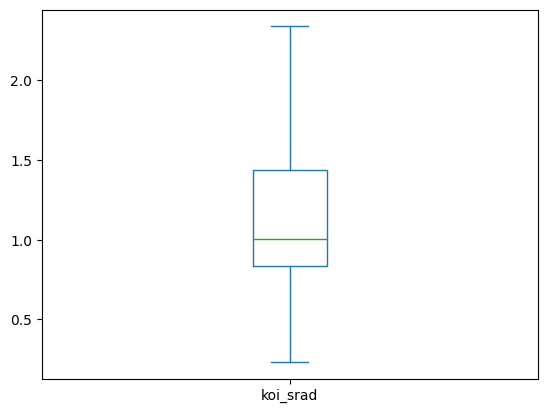

In [55]:
df['koi_srad'].plot(kind='box')
plt.show()

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9564 entries, 0 to 9563
Data columns (total 48 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   rowid              9564 non-null   int64  
 1   kepid              9564 non-null   int64  
 2   kepoi_name         9564 non-null   object 
 3   koi_disposition    9564 non-null   object 
 4   koi_pdisposition   9564 non-null   object 
 5   koi_score          9564 non-null   float64
 6   koi_fpflag_nt      9564 non-null   int64  
 7   koi_fpflag_ss      9564 non-null   int64  
 8   koi_fpflag_co      9564 non-null   int64  
 9   koi_fpflag_ec      9564 non-null   int64  
 10  koi_period         9564 non-null   float64
 11  koi_period_err1    9110 non-null   float64
 12  koi_period_err2    9110 non-null   float64
 13  koi_time0bk        9564 non-null   float64
 14  koi_time0bk_err1   9110 non-null   float64
 15  koi_time0bk_err2   9110 non-null   float64
 16  koi_impact         9564 

# **Univariate Analysis for categorical columns**

In [ ]:
df['koi_disposition'].value_counts()

,count
koi_disposition,
FALSE POSITIVE,5023
CONFIRMED,2293
CANDIDATE,2248


<Axes: xlabel='koi_disposition'>

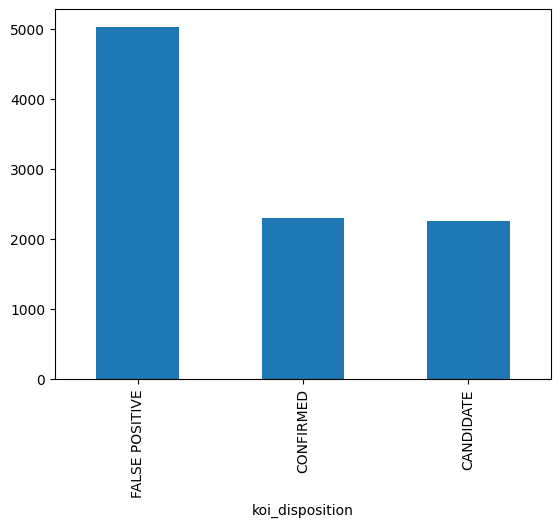

In [ ]:
df['koi_disposition'].value_counts().plot(kind='bar')


<Axes: ylabel='count'>

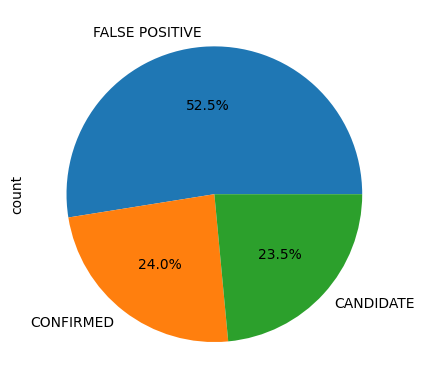

In [ ]:
df['koi_disposition'].value_counts().plot(kind='pie', autopct='%0.1f%%')

In [ ]:
df['koi_pdisposition'].value_counts()

,count
koi_pdisposition,
FALSE POSITIVE,5068
CANDIDATE,4496


<Axes: xlabel='koi_pdisposition'>

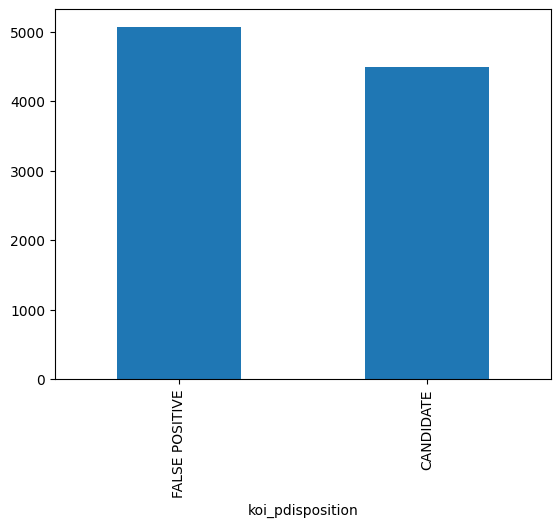

In [ ]:
df['koi_pdisposition'].value_counts().plot(kind='bar')

<Axes: ylabel='count'>

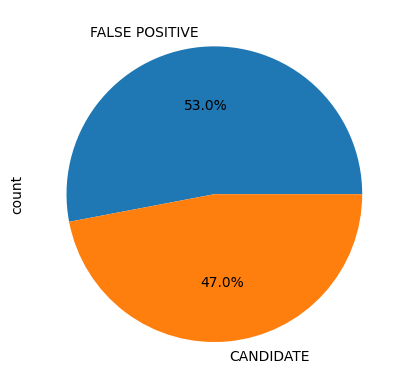

In [ ]:
df['koi_pdisposition'].value_counts().plot(kind='pie', autopct='%0.1f%%')

In [ ]:
df['koi_pdisposition'].isnull().sum()

0

In [ ]:
df['koi_tce_delivname'].value_counts()

,count
koi_tce_delivname,
q1_q17_dr25_tce,8054
q1_q16_tce,796
q1_q17_dr24_tce,368


<Axes: xlabel='koi_tce_delivname'>

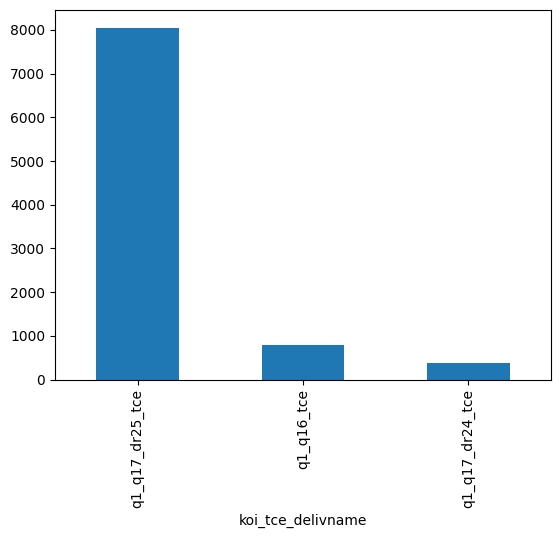

In [ ]:
df['koi_tce_delivname'].value_counts().plot(kind='bar')

<Axes: ylabel='count'>

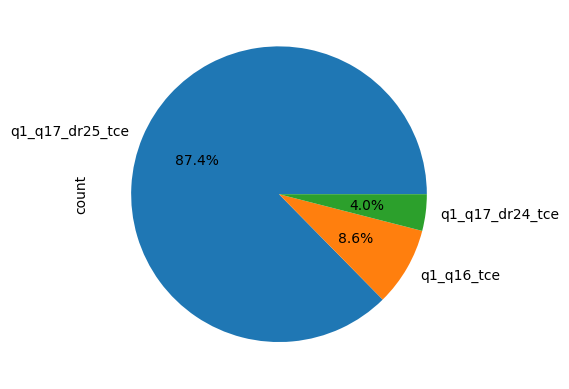

In [ ]:
df['koi_tce_delivname'].value_counts().plot(kind='pie', autopct='%0.1f%%')

In [ ]:
df['koi_tce_delivname'].isnull().sum()

346

In [ ]:
df['koi_tce_delivname'].mode()

0    q1_q17_dr25_tce
Name: koi_tce_delivname, dtype: object

# **Handling missing values of Categorical columns**

In [57]:
df['koi_tce_delivname']=df['koi_tce_delivname'].fillna(df['koi_tce_delivname'].mode()[0])
df['koi_tce_delivname'].isnull().sum()

0

# **Univariate Analysis on columns with err and fpflag**

<Axes: ylabel='Frequency'>

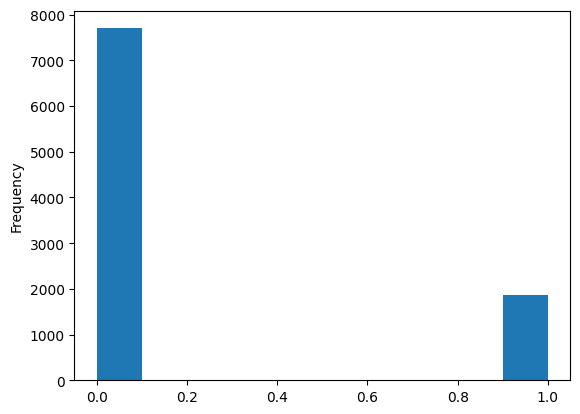

In [ ]:
df['koi_fpflag_co'].plot(kind='hist')

<Axes: >

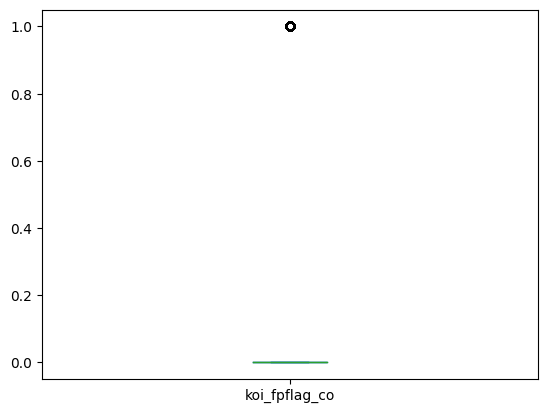

In [ ]:
df['koi_fpflag_co'].plot(kind='box')

In [ ]:
df['koi_fpflag_co'].isnull().sum()

0

<Axes: ylabel='Frequency'>

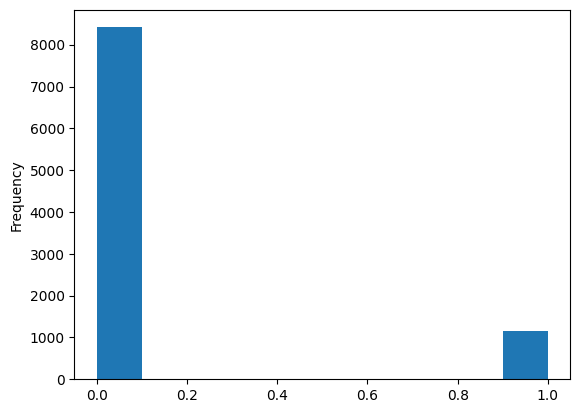

In [ ]:
df['koi_fpflag_ec'].plot(kind='hist')

<Axes: >

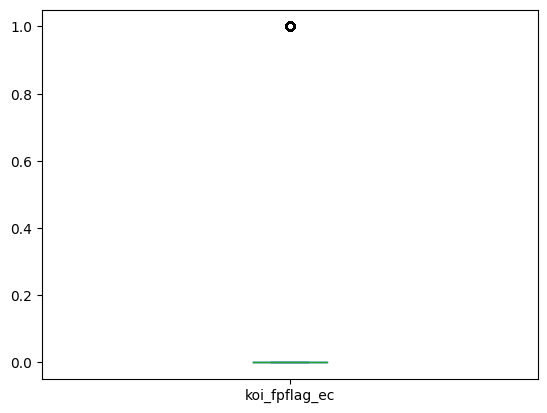

In [ ]:
df['koi_fpflag_ec'].plot(kind='box')

In [ ]:
df['koi_fpflag_ec'].isnull().sum()

0

<Axes: ylabel='Frequency'>

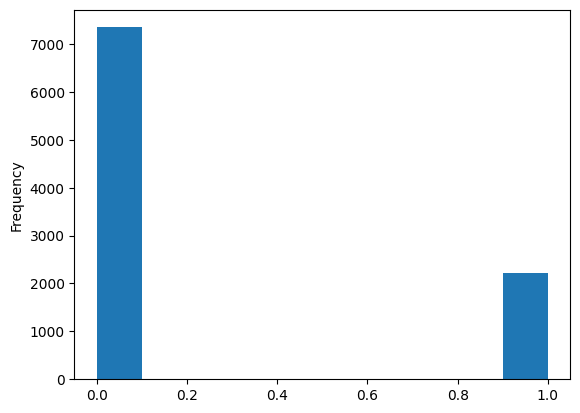

In [ ]:
df['koi_fpflag_ss'].plot(kind='hist')

<Axes: >

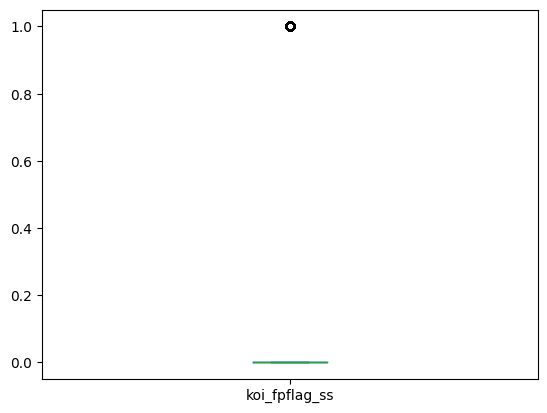

In [ ]:
df['koi_fpflag_ss'].plot(kind='box')

In [ ]:
df['koi_fpflag_ss'].isnull().sum()

0

<Axes: ylabel='Frequency'>

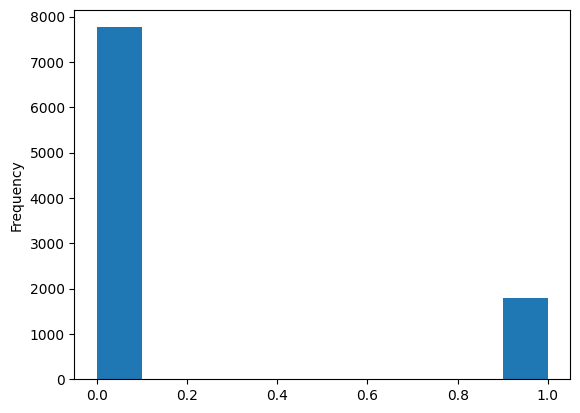

In [ ]:
df['koi_fpflag_nt'].plot(kind='hist')

<Axes: >

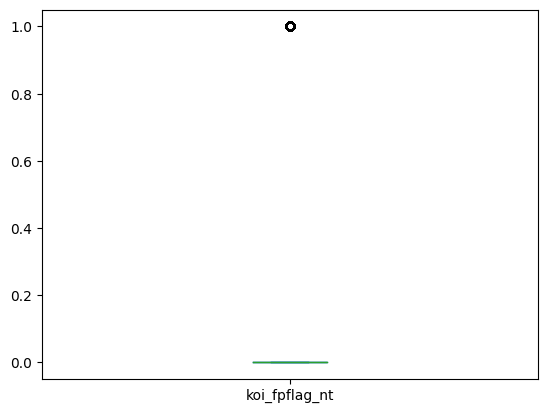

In [ ]:
df['koi_fpflag_nt'].plot(kind='box')

In [ ]:
df['koi_fpflag_nt'].isnull().sum()

0

In [ ]:
time_err=['koi_time0bk_err1','koi_time0bk_err2']

array([[<Axes: title={'center': 'koi_time0bk_err1'}>,
        <Axes: title={'center': 'koi_time0bk_err2'}>]], dtype=object)

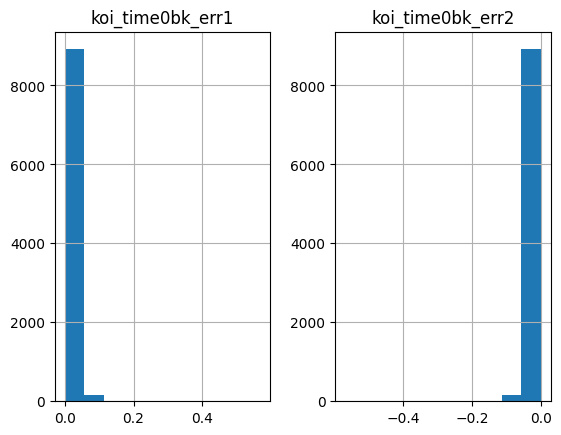

In [ ]:
df[time_err].hist()

<Axes: >

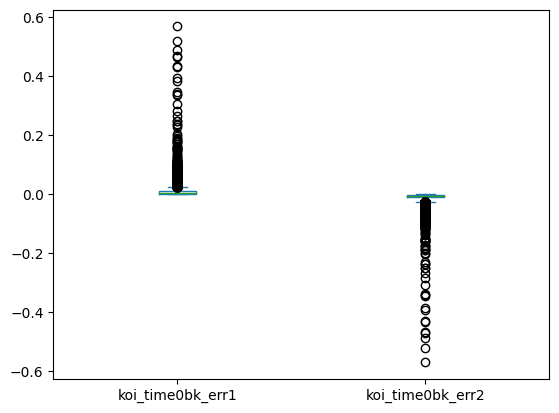

In [ ]:
df[time_err].plot(kind='box')

In [ ]:
df[time_err].isnull().sum()

,0
koi_time0bk_err1,454
koi_time0bk_err2,454


In [ ]:
impact_err=['koi_impact_err1','koi_impact_err2']

array([[<Axes: title={'center': 'koi_impact_err1'}>,
        <Axes: title={'center': 'koi_impact_err2'}>]], dtype=object)

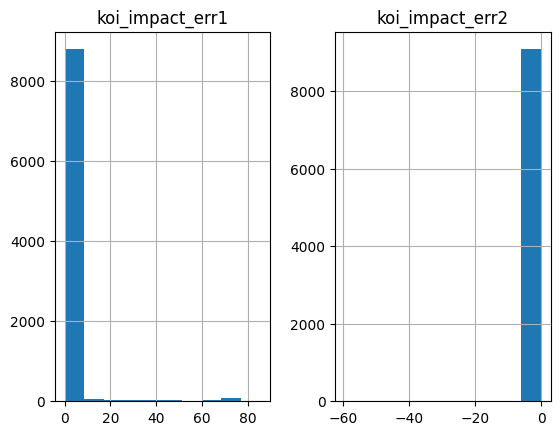

In [ ]:
df[impact_err].hist()

<Axes: >

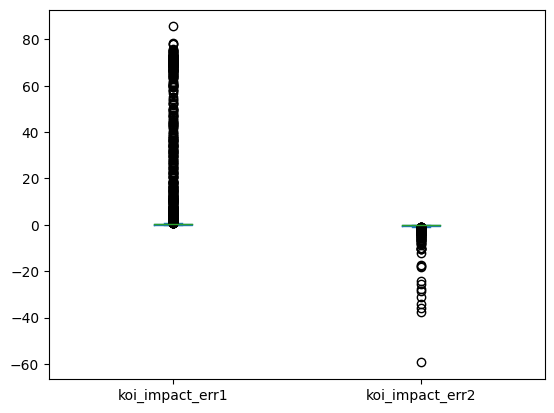

In [ ]:
df[impact_err].plot(kind='box')

In [ ]:
df[impact_err].isnull().sum()

,0
koi_impact_err1,454
koi_impact_err2,454


In [ ]:
duration_err=['koi_duration_err1','koi_duration_err2']

array([[<Axes: title={'center': 'koi_duration_err1'}>,
        <Axes: title={'center': 'koi_duration_err2'}>]], dtype=object)

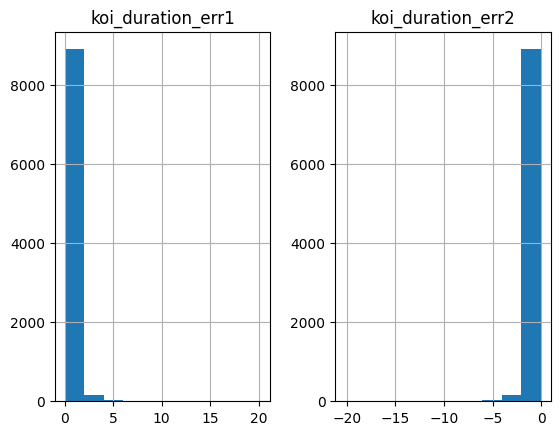

In [ ]:
df[duration_err].hist()

<Axes: >

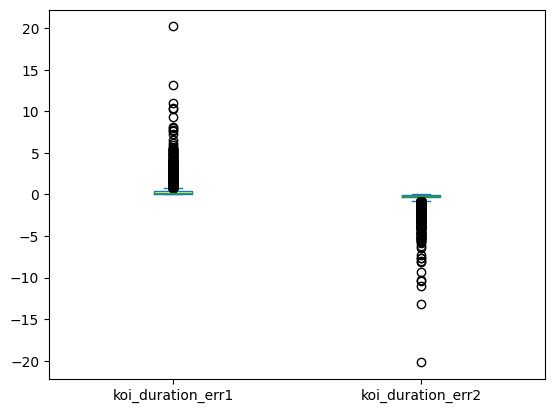

In [ ]:
df[duration_err].plot(kind='box')

In [ ]:
df[duration_err].isnull().sum()

,0
koi_duration_err1,454
koi_duration_err2,454


In [ ]:
depth_err=['koi_depth_err1','koi_depth_err2']

array([[<Axes: title={'center': 'koi_depth_err1'}>,
        <Axes: title={'center': 'koi_depth_err2'}>]], dtype=object)

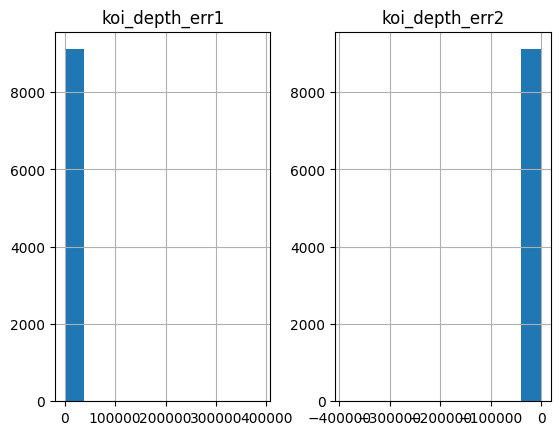

In [ ]:
df[depth_err].hist()

<Axes: >

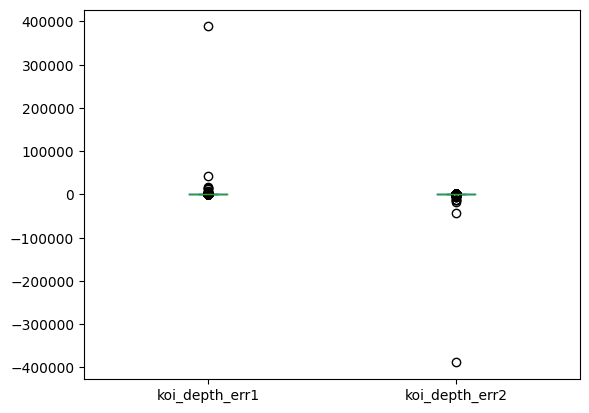

In [ ]:
df[depth_err].plot(kind='box')

In [ ]:
df[depth_err].isnull().sum()

,0
koi_depth_err1,454
koi_depth_err2,454


In [ ]:
prad_err=['koi_prad_err1','koi_prad_err2']

array([[<Axes: title={'center': 'koi_prad_err1'}>,
        <Axes: title={'center': 'koi_prad_err2'}>]], dtype=object)

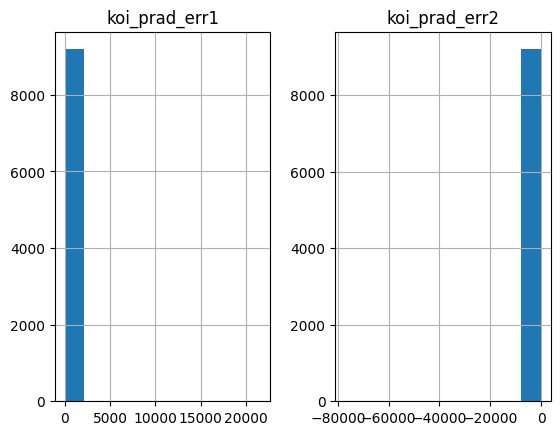

In [ ]:
df[prad_err].hist()

<Axes: >

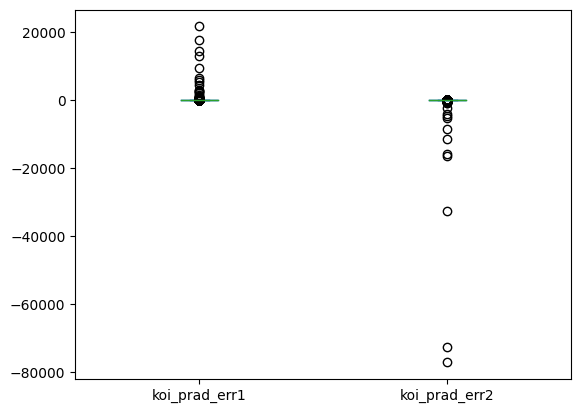

In [ ]:
df[prad_err].plot(kind='box')

In [ ]:
df[prad_err].isnull().sum()

,0
koi_prad_err1,363
koi_prad_err2,363


In [ ]:
insol_err=['koi_insol_err1','koi_insol_err2']

array([[<Axes: title={'center': 'koi_insol_err1'}>,
        <Axes: title={'center': 'koi_insol_err2'}>]], dtype=object)

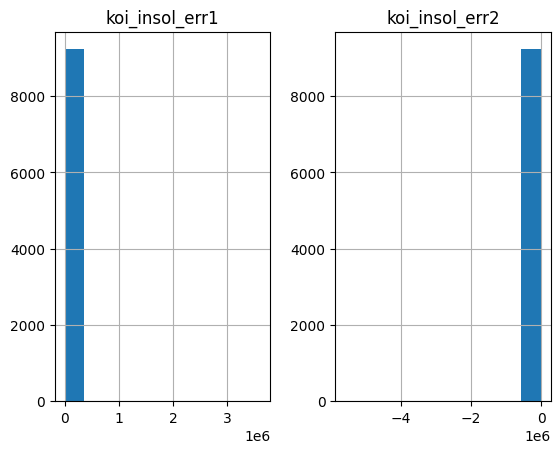

In [ ]:
df[insol_err].hist()

<Axes: >

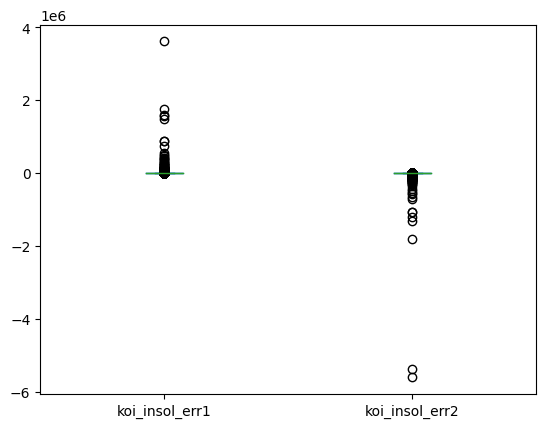

In [ ]:
df[insol_err].plot(kind='box')

In [ ]:
df[insol_err].isnull().sum()

,0
koi_insol_err1,321
koi_insol_err2,321


<Axes: >

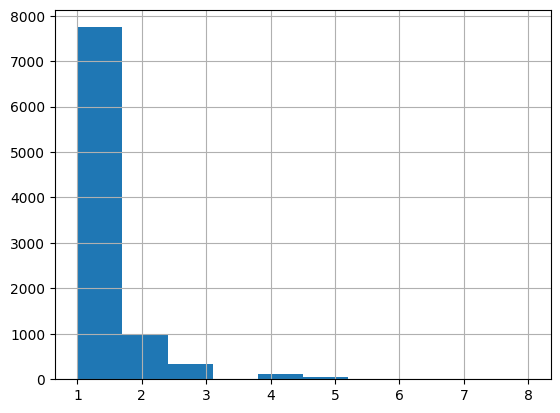

In [ ]:
df['koi_tce_plnt_num'].hist()

<Axes: >

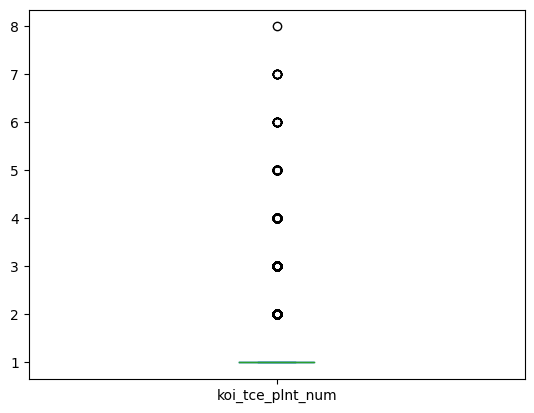

In [ ]:
df['koi_tce_plnt_num'].plot(kind='box')

In [ ]:
df['koi_tce_plnt_num'].isnull().sum()

346

In [ ]:
steff_err=['koi_steff_err1','koi_steff_err2']

array([[<Axes: title={'center': 'koi_steff_err1'}>,
        <Axes: title={'center': 'koi_steff_err2'}>]], dtype=object)

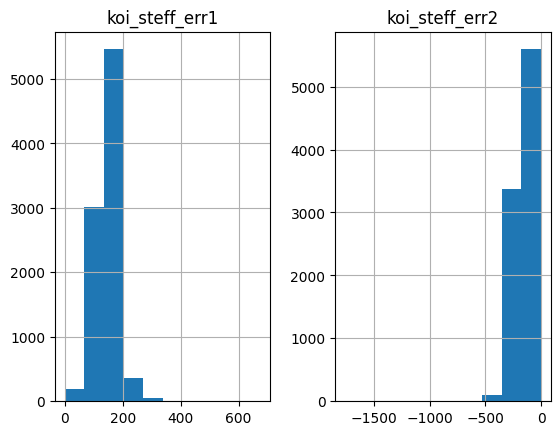

In [ ]:
df[steff_err].hist()

<Axes: >

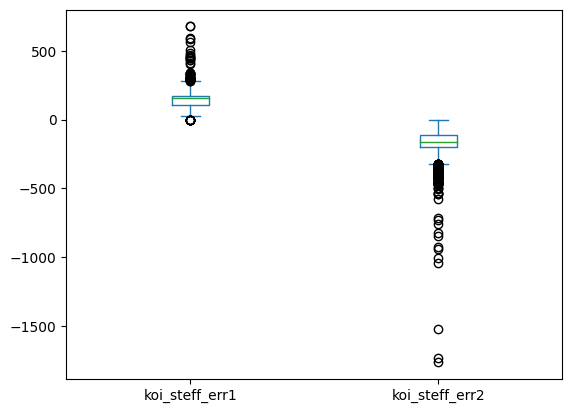

In [ ]:
df[steff_err].plot(kind='box')

In [ ]:
df[steff_err].isnull().sum()

,0
koi_steff_err1,468
koi_steff_err2,483


In [ ]:
slogg_err=['koi_slogg_err1','koi_slogg_err2']

array([[<Axes: title={'center': 'koi_slogg_err1'}>,
        <Axes: title={'center': 'koi_slogg_err2'}>]], dtype=object)

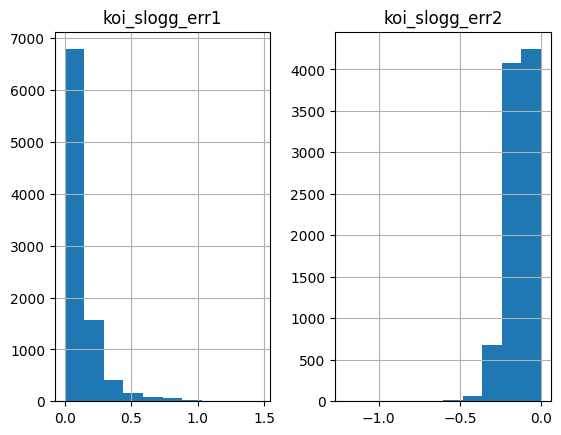

In [ ]:
df[slogg_err].hist()

<Axes: >

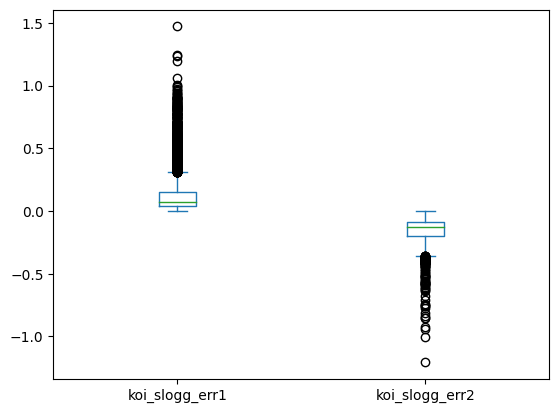

In [ ]:
df[slogg_err].plot(kind='box')

In [ ]:
df[slogg_err].isnull().sum()

,0
koi_slogg_err1,468
koi_slogg_err2,468


In [ ]:
srad_err=['koi_srad_err1','koi_srad_err2']

array([[<Axes: title={'center': 'koi_srad_err1'}>,
        <Axes: title={'center': 'koi_srad_err2'}>]], dtype=object)

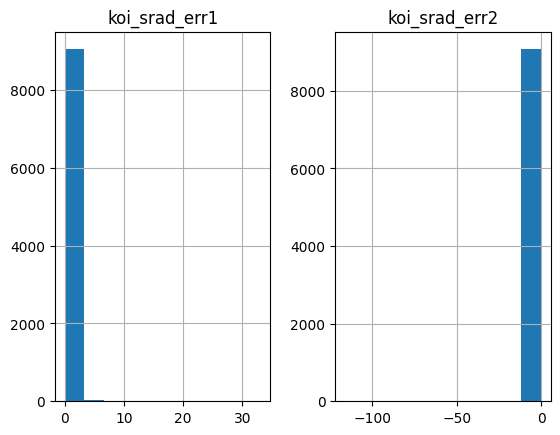

In [ ]:
df[srad_err].hist()

<Axes: >

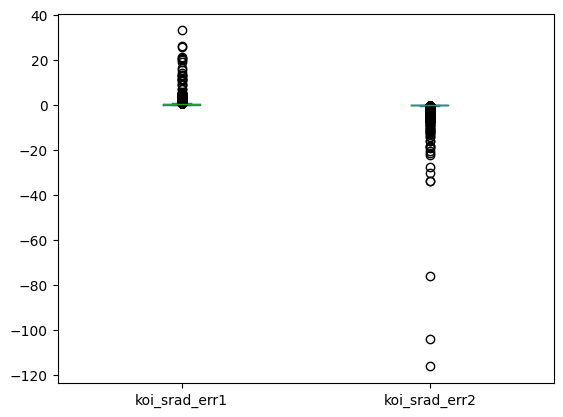

In [ ]:
df[srad_err].plot(kind='box')

In [ ]:
df[srad_err].isnull().sum()

,0
koi_srad_err1,468
koi_srad_err2,468


# **Handling Missing values for above columns**

In [58]:
err_col=['koi_fpflag_co',
'koi_fpflag_ec',
'koi_fpflag_ss',
'koi_fpflag_nt',
'koi_time0bk_err1',
'koi_time0bk_err2',
'koi_impact_err1',
'koi_impact_err2',
'koi_duration_err1',
'koi_duration_err2',
'koi_depth_err1',
'koi_depth_err2',
'koi_period_err1',
'koi_period_err2',
'koi_prad_err1',
'koi_prad_err2',
'koi_insol_err1',
'koi_insol_err2',
'koi_tce_plnt_num',
'koi_steff_err1',
'koi_steff_err2',
'koi_slogg_err1',
'koi_slogg_err2',
'koi_srad_err1',
'koi_srad_err2'
]
df[err_col]=df[err_col].fillna(df[err_col].mean())
df.isnull().sum()

,0
rowid,0
kepid,0
kepoi_name,0
koi_disposition,0
koi_pdisposition,0
koi_score,0
koi_fpflag_nt,0
koi_fpflag_ss,0
koi_fpflag_co,0
koi_fpflag_ec,0


# **Handling Outliers Part 2**

In [59]:
lmt1=df['koi_time0bk_err1'].quantile(0.25)
lmt2=df['koi_time0bk_err1'].quantile(0.75)
iqr=lmt2-lmt1
upper_lmt=lmt2+1.5*iqr
lower_lmt=lmt1-1.5*iqr

In [60]:
df['koi_time0bk_err1']=np.where(
    df['koi_time0bk_err1']>upper_lmt,
    upper_lmt,
    np.where(
        df['koi_time0bk_err1']<lower_lmt,
        lower_lmt,
        df['koi_time0bk_err1']
    )
)


<Axes: >

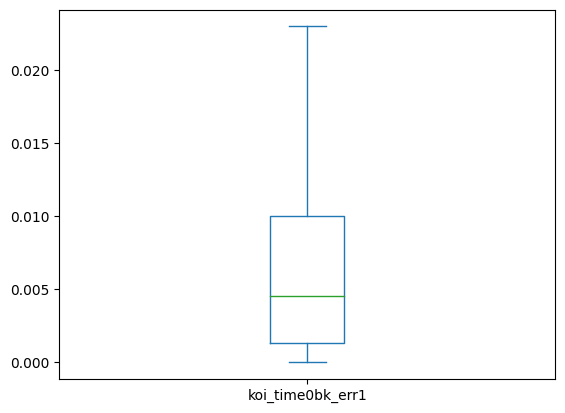

In [61]:
df['koi_time0bk_err1'].plot(kind='box')

In [62]:
lmt1=df['koi_time0bk_err2'].quantile(0.25)
lmt2=df['koi_time0bk_err2'].quantile(0.75)
iqr=lmt2-lmt1
upper_lmt=lmt2+1.5*iqr
lower_lmt=lmt1-1.5*iqr

In [63]:
df['koi_time0bk_err2']=np.where(
    df['koi_time0bk_err2']>upper_lmt,
    upper_lmt,
    np.where(
        df['koi_time0bk_err2']<lower_lmt,
        lower_lmt,
        df['koi_time0bk_err2']
    )
)

<Axes: >

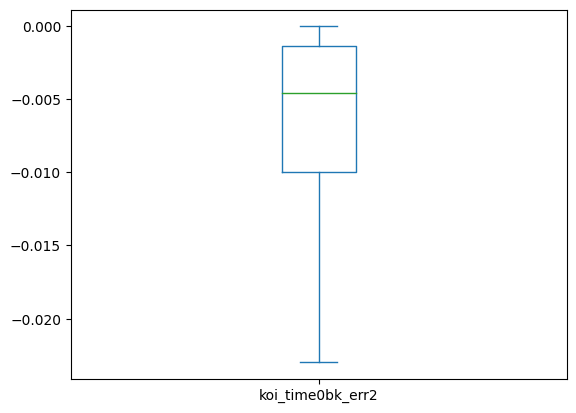

In [64]:
df['koi_time0bk_err2'].plot(kind='box')

In [65]:
lmt1=df['koi_impact_err1'].quantile(0.25)
lmt2=df['koi_impact_err1'].quantile(0.75)
iqr=lmt2-lmt1
upper_lmt=lmt2+1.5*iqr
lower_lmt=lmt1-1.5*iqr

In [66]:
df['koi_impact_err1']=np.where(
    df['koi_impact_err1']>upper_lmt,
    upper_lmt,
    np.where(
        df['koi_impact_err1']<lower_lmt,
        lower_lmt,
        df['koi_impact_err1']
    )
)

<Axes: >

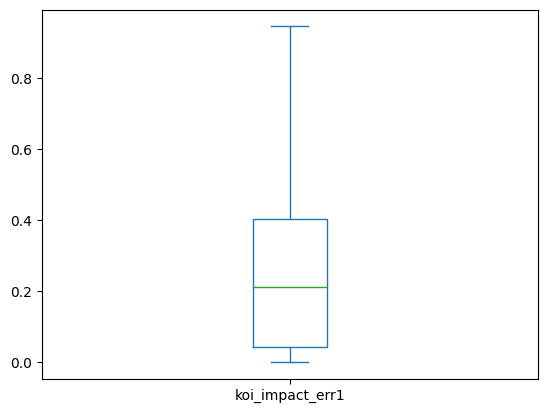

In [67]:
df['koi_impact_err1'].plot(kind='box')

In [68]:
lmt1=df['koi_impact_err2'].quantile(0.25)
lmt2=df['koi_impact_err2'].quantile(0.75)
iqr=lmt2-lmt1
upper_lmt=lmt2+1.5*iqr
lower_lmt=lmt1-1.5*iqr

In [69]:
df['koi_impact_err2']=np.where(
    df['koi_impact_err2']>upper_lmt,
    upper_lmt,
    np.where(
        df['koi_impact_err2']<lower_lmt,
        lower_lmt,
        df['koi_impact_err2']
    )
)

<Axes: >

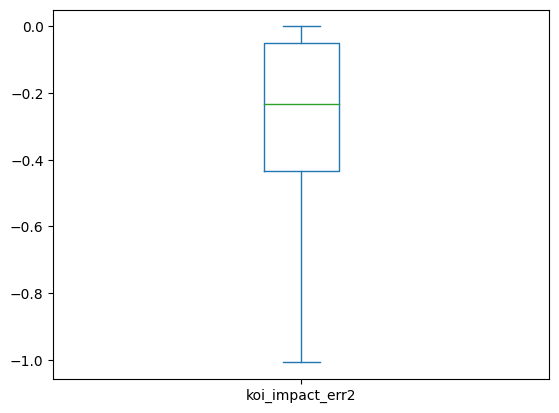

In [70]:
df['koi_impact_err2'].plot(kind='box')

In [71]:
lmt1=df['koi_duration_err1'].quantile(0.25)
lmt2=df['koi_duration_err1'].quantile(0.75)
iqr=lmt2-lmt1
upper_lmt=lmt2+1.5*iqr
lower_lmt=lmt1-1.5*iqr

In [72]:
df['koi_duration_err1']=np.where(
    df['koi_duration_err1']>upper_lmt,
    upper_lmt,
    np.where(
        df['koi_duration_err1']<lower_lmt,
        lower_lmt,
        df['koi_duration_err1']
    )
)

<Axes: >

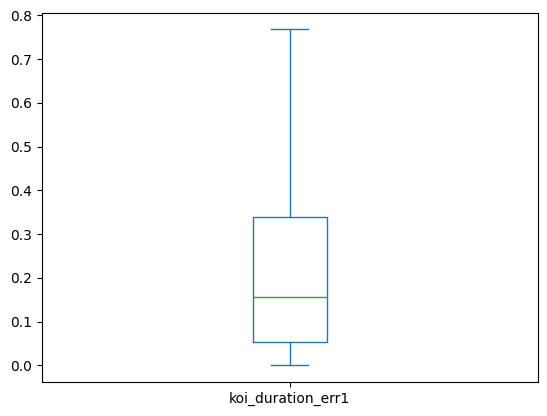

In [73]:
df['koi_duration_err1'].plot(kind='box')

In [74]:
lmt1=df['koi_duration_err2'].quantile(0.25)
lmt2=df['koi_duration_err2'].quantile(0.75)
iqr=lmt2-lmt1
upper_lmt=lmt2+1.5*iqr
lower_lmt=lmt1-1.5*iqr

In [75]:
df['koi_duration_err2']=np.where(
    df['koi_duration_err2']>upper_lmt,
    upper_lmt,
    np.where(
        df['koi_duration_err2']<lower_lmt,
        lower_lmt,
        df['koi_duration_err2']
    )
)

<Axes: >

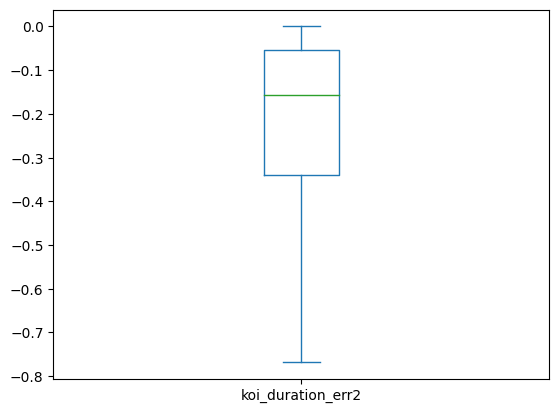

In [76]:
df['koi_duration_err2'].plot(kind='box')

In [77]:
lmt1=df['koi_depth_err1'].quantile(0.25)
lmt2=df['koi_depth_err1'].quantile(0.75)
iqr=lmt2-lmt1
upper_lmt=lmt2+1.5*iqr
lower_lmt=lmt1-1.5*iqr

In [78]:
df['koi_depth_err1']=np.where(
    df['koi_depth_err1']>upper_lmt,
    upper_lmt,
    np.where(
        df['koi_depth_err1']<lower_lmt,
        lower_lmt,
        df['koi_depth_err1']
    )
)

<Axes: >

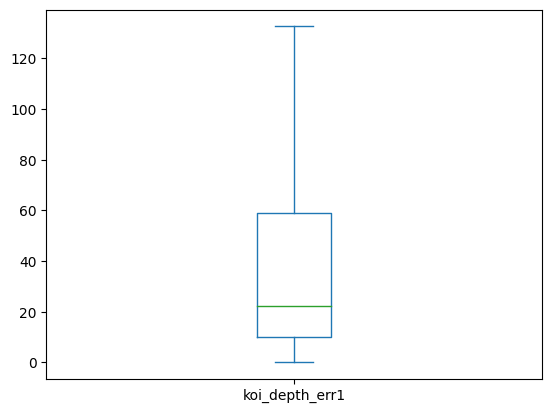

In [79]:
df['koi_depth_err1'].plot(kind='box')

In [80]:
lmt1=df['koi_depth_err2'].quantile(0.25)
lmt2=df['koi_depth_err2'].quantile(0.75)
iqr=lmt2-lmt1
upper_lmt=lmt2+1.5*iqr
lower_lmt=lmt1-1.5*iqr

In [81]:
df['koi_depth_err2']=np.where(
    df['koi_depth_err2']>upper_lmt,
    upper_lmt,
    np.where(
        df['koi_depth_err2']<lower_lmt,
        lower_lmt,
        df['koi_depth_err2']
    )
)

<Axes: >

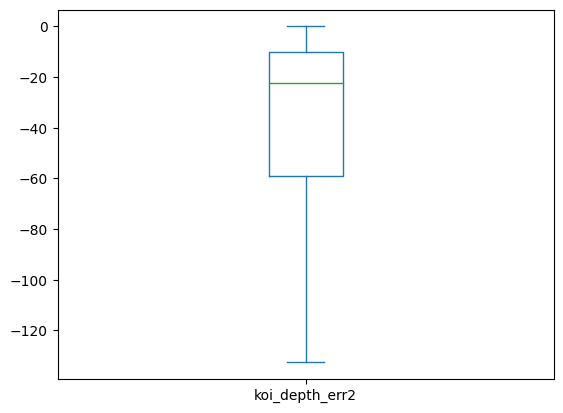

In [82]:
df['koi_depth_err2'].plot(kind='box')

In [83]:
lmt1=df['koi_prad_err1'].quantile(0.25)
lmt2=df['koi_prad_err1'].quantile(0.75)
iqr=lmt2-lmt1
upper_lmt=lmt2+1.5*iqr
lower_lmt=lmt1-1.5*iqr

In [84]:
df['koi_prad_err1']=np.where(
    df['koi_prad_err1']>upper_lmt,
    upper_lmt,
    np.where(
        df['koi_prad_err1']<lower_lmt,
        lower_lmt,
        df['koi_prad_err1']
    )
)

<Axes: >

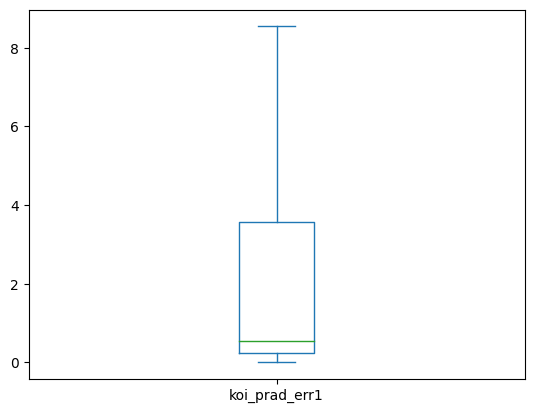

In [85]:
df['koi_prad_err1'].plot(kind='box')

In [86]:
lmt1=df['koi_prad_err2'].quantile(0.25)
lmt2=df['koi_prad_err2'].quantile(0.75)
iqr=lmt2-lmt1
upper_lmt=lmt2+1.5*iqr
lower_lmt=lmt1-1.5*iqr

In [87]:
df['koi_prad_err2']=np.where(
    df['koi_prad_err2']>upper_lmt,
    upper_lmt,
    np.where(
        df['koi_prad_err2']<lower_lmt,
        lower_lmt,
        df['koi_prad_err2']
    )
)

<Axes: >

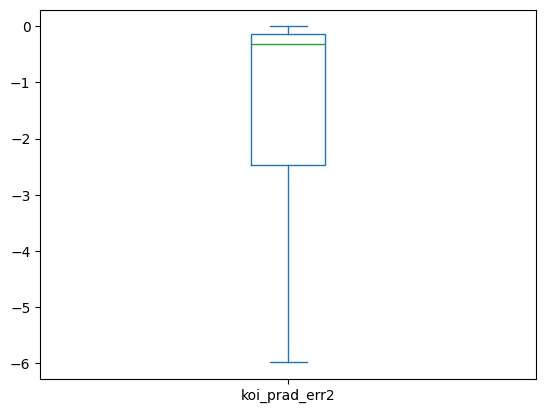

In [88]:
df['koi_prad_err2'].plot(kind='box')

In [89]:
lmt1=df['koi_insol_err1'].quantile(0.25)
lmt2=df['koi_insol_err1'].quantile(0.75)
iqr=lmt2-lmt1
upper_lmt=lmt2+1.5*iqr
lower_lmt=lmt1-1.5*iqr

In [90]:
df['koi_insol_err1']=np.where(
    df['koi_insol_err1']>upper_lmt,
    upper_lmt,
    np.where(
        df['koi_insol_err1']<lower_lmt,
        lower_lmt,
        df['koi_insol_err1']
    )
)

<Axes: >

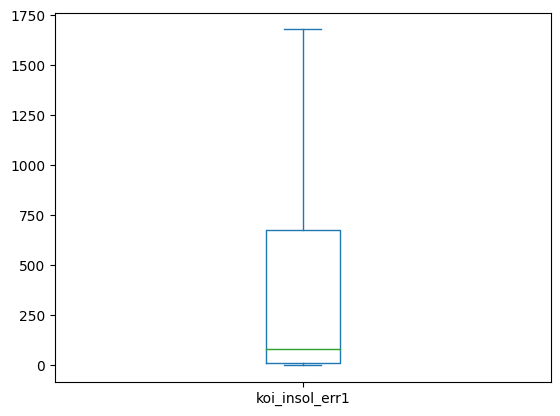

In [91]:
df['koi_insol_err1'].plot(kind='box')

In [92]:
lmt1=df['koi_insol_err2'].quantile(0.25)
lmt2=df['koi_insol_err2'].quantile(0.75)
iqr=lmt2-lmt1
upper_lmt=lmt2+1.5*iqr
lower_lmt=lmt1-1.5*iqr

In [93]:
df['koi_insol_err2']=np.where(
    df['koi_insol_err2']>upper_lmt,
    upper_lmt,
    np.where(
        df['koi_insol_err2']<lower_lmt,
        lower_lmt,
        df['koi_insol_err2']
    )
)

<Axes: >

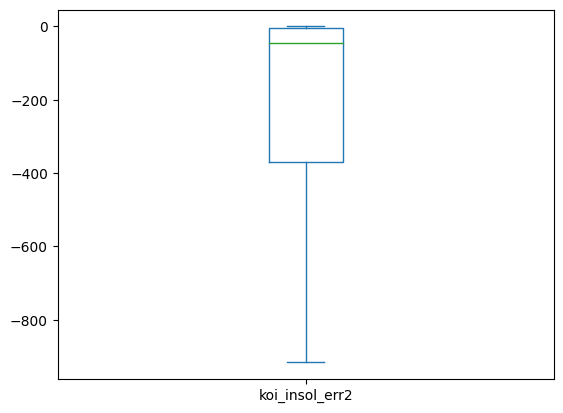

In [94]:
df['koi_insol_err2'].plot(kind='box')

In [95]:
lmt1=df['koi_tce_plnt_num'].quantile(0.25)
lmt2=df['koi_tce_plnt_num'].quantile(0.75)
iqr=lmt2-lmt1
upper_lmt=lmt2+1.5*iqr
lower_lmt=lmt1-1.5*iqr

In [96]:
df['koi_tce_plnt_num']=np.where(
    df['koi_tce_plnt_num']>upper_lmt,
    upper_lmt,
    np.where(
        df['koi_tce_plnt_num']<lower_lmt,
        lower_lmt,
        df['koi_tce_plnt_num']
    )
)

<Axes: >

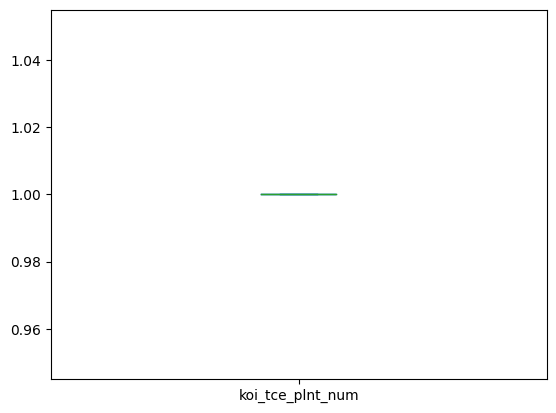

In [97]:
df['koi_tce_plnt_num'].plot(kind='box')

In [98]:
lmt1=df['koi_steff_err1'].quantile(0.25)
lmt2=df['koi_steff_err1'].quantile(0.75)
iqr=lmt2-lmt1
upper_lmt=lmt2+1.5*iqr
lower_lmt=lmt1-1.5*iqr

In [99]:
df['koi_steff_err1']=np.where(
    df['koi_steff_err1']>upper_lmt,
    upper_lmt,
    np.where(
        df['koi_steff_err1']<lower_lmt,
        lower_lmt,
        df['koi_steff_err1']
    )
)

<Axes: >

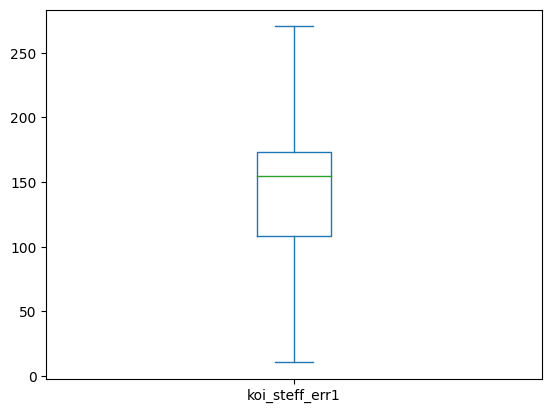

In [100]:
df['koi_steff_err1'].plot(kind='box')

In [101]:
lmt1=df['koi_steff_err2'].quantile(0.25)
lmt2=df['koi_steff_err2'].quantile(0.75)
iqr=lmt2-lmt1
upper_lmt=lmt2+1.5*iqr
lower_lmt=lmt1-1.5*iqr

In [102]:
df['koi_steff_err2']=np.where(
    df['koi_steff_err2']>upper_lmt,
    upper_lmt,
    np.where(
        df['koi_steff_err2']<lower_lmt,
        lower_lmt,
        df['koi_steff_err2']
    )
)

<Axes: >

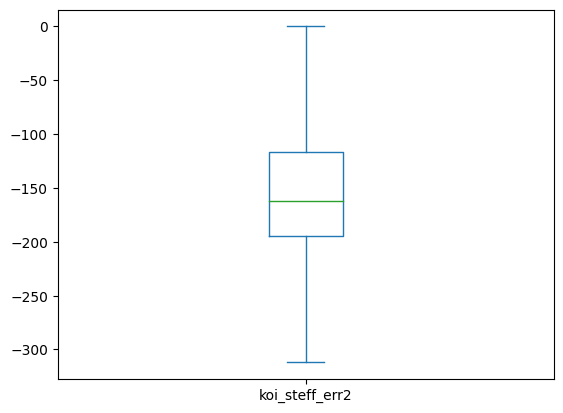

In [103]:
df['koi_steff_err2'].plot(kind='box')

In [104]:
lmt1=df['koi_slogg_err1'].quantile(0.25)
lmt2=df['koi_slogg_err1'].quantile(0.75)
iqr=lmt2-lmt1
upper_lmt=lmt2+1.5*iqr
lower_lmt=lmt1-1.5*iqr

In [105]:
df['koi_slogg_err1']=np.where(
    df['koi_slogg_err1']>upper_lmt,
    upper_lmt,
    np.where(
        df['koi_slogg_err1']<lower_lmt,
        lower_lmt,
        df['koi_slogg_err1']
    )
)

<Axes: >

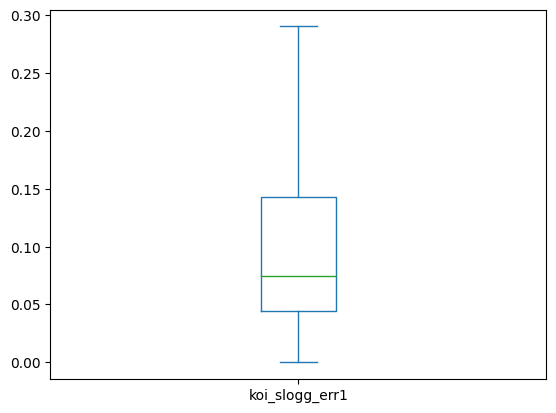

In [106]:
df['koi_slogg_err1'].plot(kind='box')

In [107]:
lmt1=df['koi_slogg_err2'].quantile(0.25)
lmt2=df['koi_slogg_err2'].quantile(0.75)
iqr=lmt2-lmt1
upper_lmt=lmt2+1.5*iqr
lower_lmt=lmt1-1.5*iqr

In [108]:
df['koi_slogg_err2']=np.where(
    df['koi_slogg_err2']>upper_lmt,
    upper_lmt,
    np.where(
        df['koi_slogg_err2']<lower_lmt,
        lower_lmt,
        df['koi_slogg_err2']
    )
)

<Axes: >

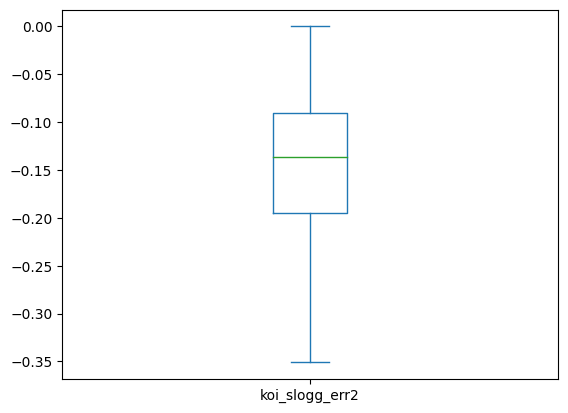

In [109]:
df['koi_slogg_err2'].plot(kind='box')

In [110]:
lmt1=df['koi_srad_err1'].quantile(0.25)
lmt2=df['koi_srad_err1'].quantile(0.75)
iqr=lmt2-lmt1
upper_lmt=lmt2+1.5*iqr
lower_lmt=lmt1-1.5*iqr

In [111]:
df['koi_srad_err1']=np.where(
    df['koi_srad_err1']>upper_lmt,
    upper_lmt,
    np.where(
        df['koi_srad_err1']<lower_lmt,
        lower_lmt,
        df['koi_srad_err1']
    )
)

<Axes: >

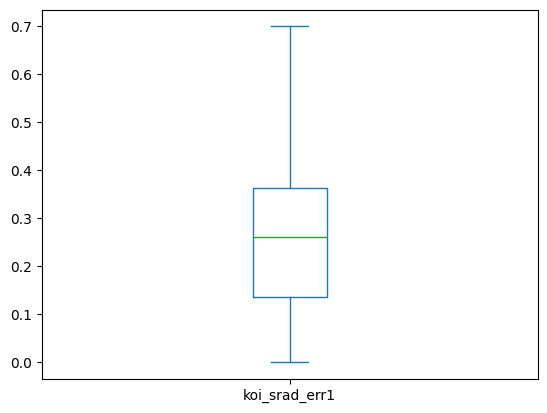

In [112]:
df['koi_srad_err1'].plot(kind='box')

In [113]:
lmt1=df['koi_srad_err2'].quantile(0.25)
lmt2=df['koi_srad_err2'].quantile(0.75)
iqr=lmt2-lmt1
upper_lmt=lmt2+1.5*iqr
lower_lmt=lmt1-1.5*iqr

In [114]:
df['koi_srad_err2']=np.where(
    df['koi_srad_err2']>upper_lmt,
    upper_lmt,
    np.where(
        df['koi_srad_err2']<lower_lmt,
        lower_lmt,
        df['koi_srad_err2']
    )
)

<Axes: >

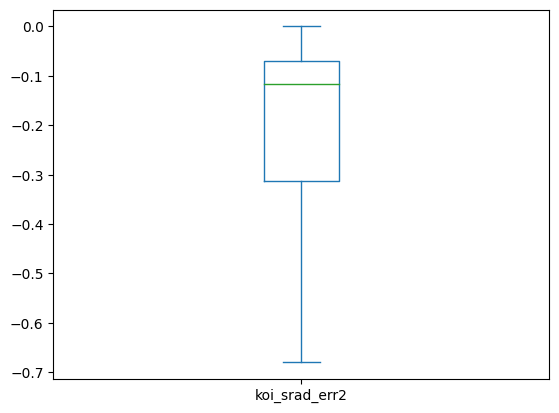

In [115]:
df['koi_srad_err2'].plot(kind='box')

# **Bivariate Analysis**

# **koi_disposition vs numerical column**



1.   one graph is skewed i.e koi_disposition vs koi_srad






In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9564 entries, 0 to 9563
Data columns (total 47 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   rowid              9564 non-null   int64  
 1   kepid              9564 non-null   int64  
 2   kepoi_name         9564 non-null   object 
 3   koi_disposition    9564 non-null   object 
 4   koi_pdisposition   9564 non-null   object 
 5   koi_score          9564 non-null   float64
 6   koi_fpflag_nt      9564 non-null   int64  
 7   koi_fpflag_ss      9564 non-null   int64  
 8   koi_fpflag_co      9564 non-null   int64  
 9   koi_fpflag_ec      9564 non-null   int64  
 10  koi_period         9564 non-null   float64
 11  koi_period_err1    9564 non-null   float64
 12  koi_period_err2    9564 non-null   float64
 13  koi_time0bk        9564 non-null   float64
 14  koi_time0bk_err1   9564 non-null   float64
 15  koi_time0bk_err2   9564 non-null   float64
 16  koi_impact         9564 

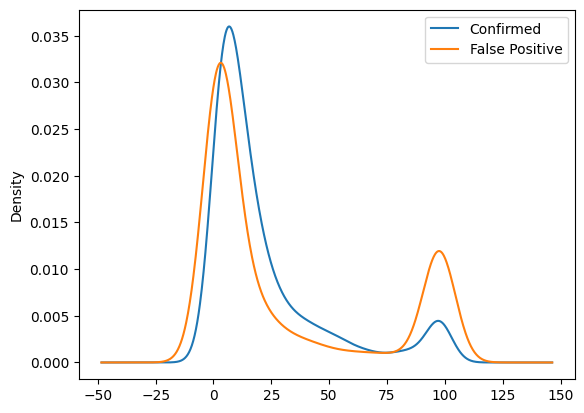

In [ ]:
df[df['koi_disposition']=='CONFIRMED']['koi_period'].plot(kind='kde', label='Confirmed')
df[df['koi_disposition']=='FALSE POSITIVE']['koi_period'].plot(kind='kde', label='False Positive')
plt.legend()
plt.show()

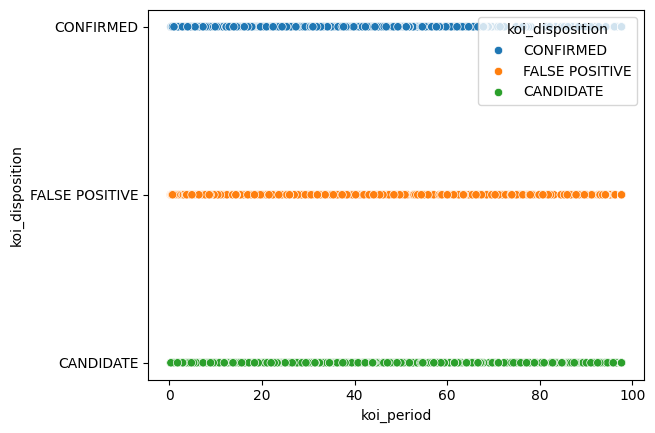

In [ ]:
sns.scatterplot(data=df, x='koi_period', y='koi_disposition', hue='koi_disposition')
plt.show()

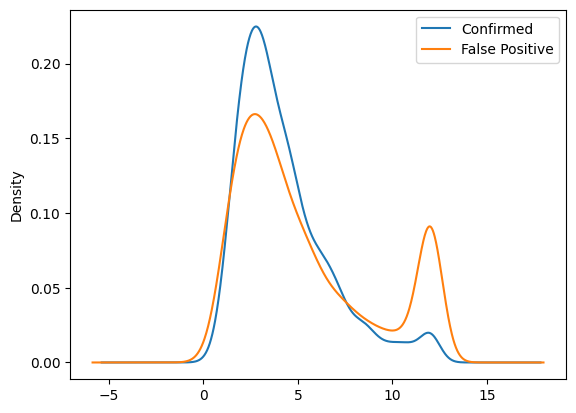

In [ ]:
df[df['koi_disposition']=='CONFIRMED']['koi_duration'].plot(kind='kde', label='Confirmed')
df[df['koi_disposition']=='FALSE POSITIVE']['koi_duration'].plot(kind='kde', label='False Positive')
plt.legend()
plt.show()

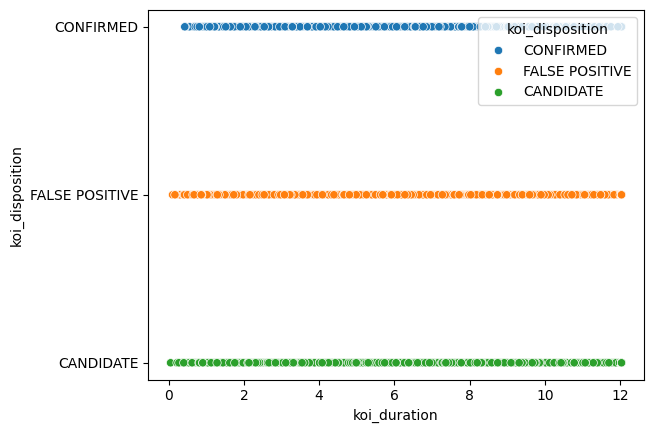

In [ ]:
sns.scatterplot(data=df, x='koi_duration', y='koi_disposition', hue='koi_disposition')
plt.show()

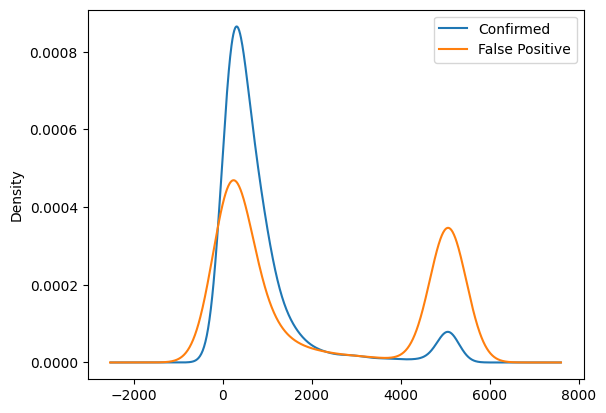

In [ ]:
df[df['koi_disposition']=='CONFIRMED']['koi_depth'].plot(kind='kde', label='Confirmed')
df[df['koi_disposition']=='FALSE POSITIVE']['koi_depth'].plot(kind='kde', label='False Positive')
plt.legend()
plt.show()

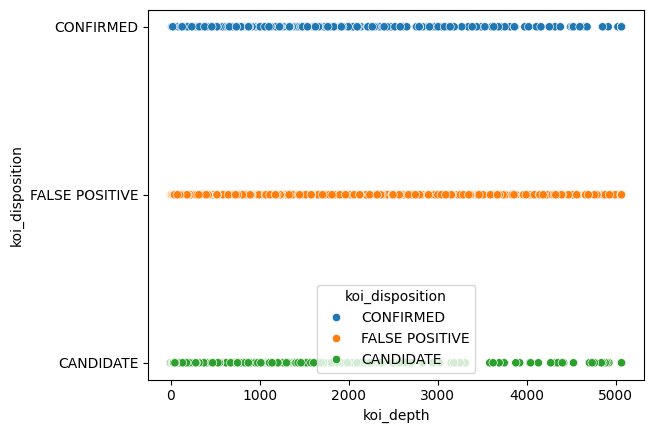

In [ ]:
sns.scatterplot(data=df, x='koi_depth', y='koi_disposition', hue='koi_disposition')
plt.show()

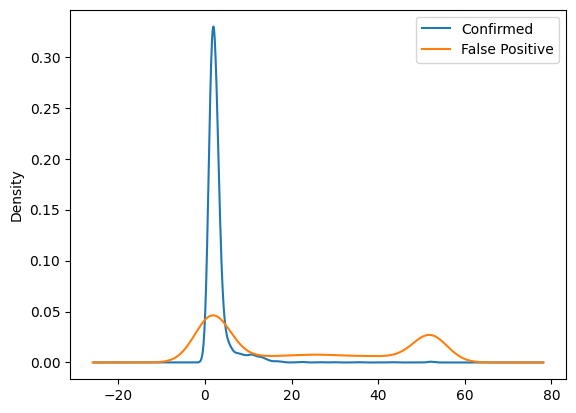

In [ ]:
df[df['koi_disposition']=='CONFIRMED']['koi_prad'].plot(kind='kde', label='Confirmed')
df[df['koi_disposition']=='FALSE POSITIVE']['koi_prad'].plot(kind='kde', label='False Positive')
plt.legend()
plt.show()

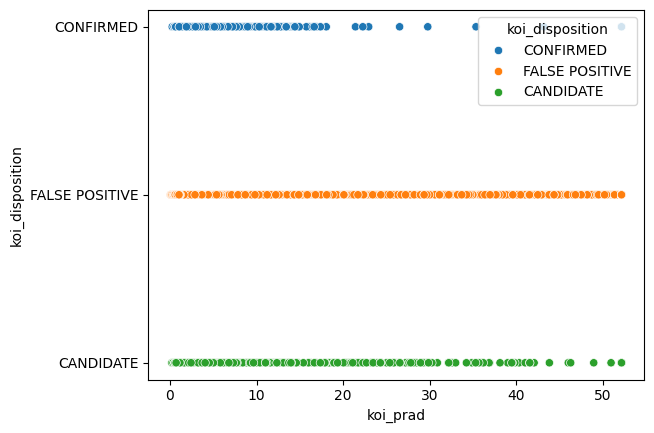

In [ ]:
sns.scatterplot(data=df, x='koi_prad', y='koi_disposition', hue='koi_disposition')
plt.show()

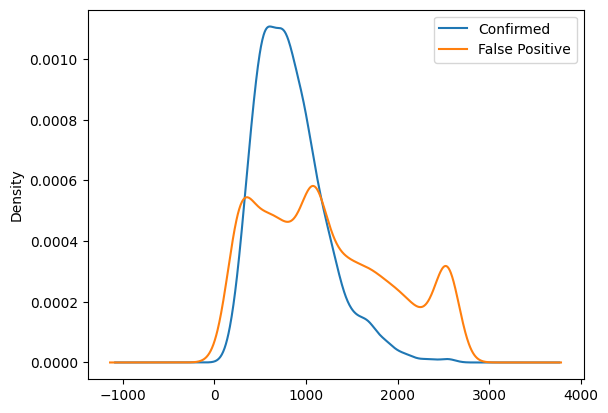

In [ ]:
df[df['koi_disposition']=='CONFIRMED']['koi_teq'].plot(kind='kde', label='Confirmed')
df[df['koi_disposition']=='FALSE POSITIVE']['koi_teq'].plot(kind='kde', label='False Positive')
plt.legend()
plt.show()

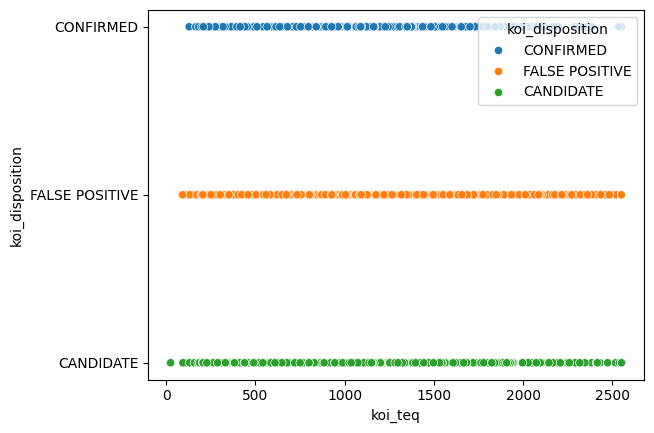

In [ ]:
sns.scatterplot(data=df, x='koi_teq', y='koi_disposition', hue='koi_disposition')
plt.show()

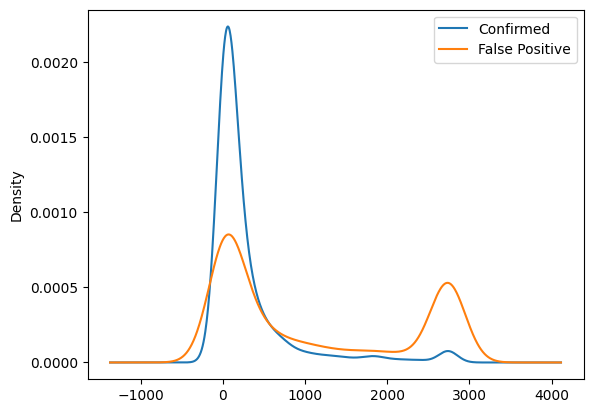

In [ ]:
df[df['koi_disposition']=='CONFIRMED']['koi_insol'].plot(kind='kde', label='Confirmed')
df[df['koi_disposition']=='FALSE POSITIVE']['koi_insol'].plot(kind='kde', label='False Positive')
plt.legend()
plt.show()

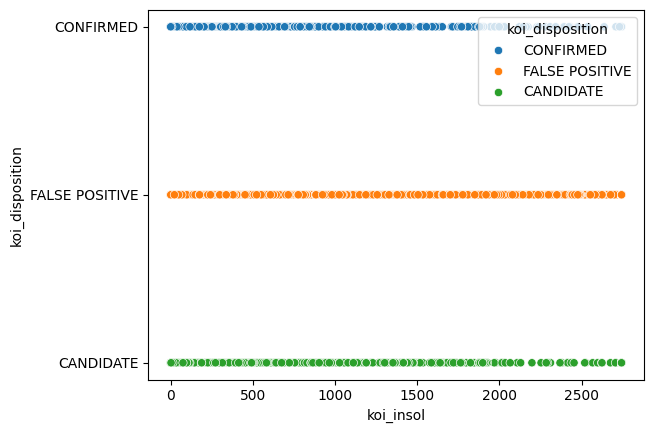

In [ ]:
sns.scatterplot(data=df, x='koi_insol', y='koi_disposition', hue='koi_disposition')
plt.show()

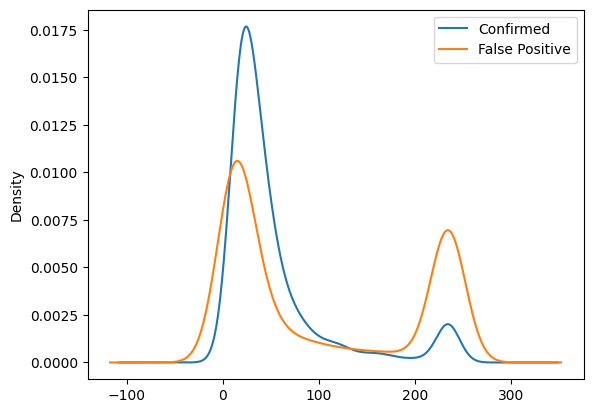

In [ ]:
df[df['koi_disposition']=='CONFIRMED']['koi_model_snr'].plot(kind='kde', label='Confirmed')
df[df['koi_disposition']=='FALSE POSITIVE']['koi_model_snr'].plot(kind='kde', label='False Positive')
plt.legend()
plt.show()

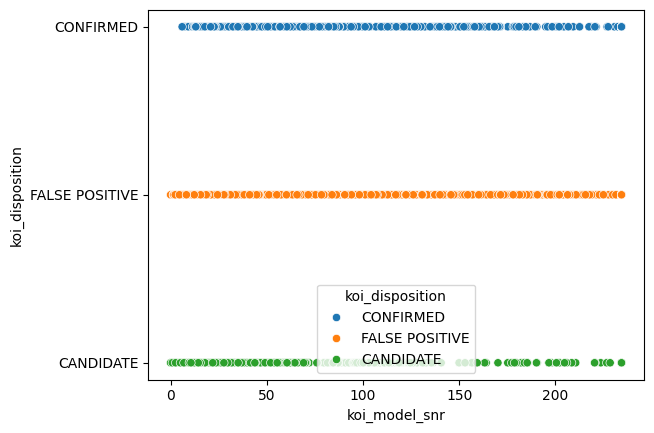

In [ ]:
sns.scatterplot(data=df, x='koi_model_snr', y='koi_disposition', hue='koi_disposition')
plt.show()

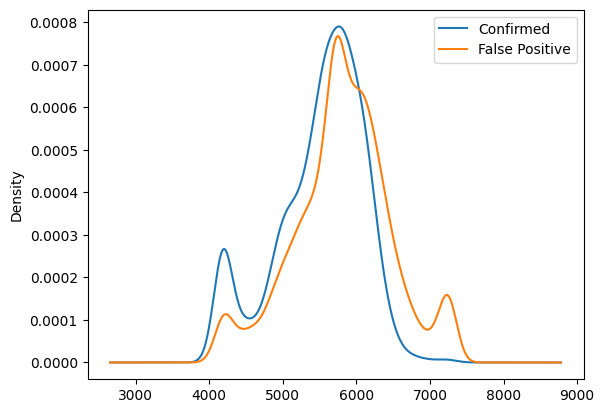

In [ ]:
df[df['koi_disposition']=='CONFIRMED']['koi_steff'].plot(kind='kde', label='Confirmed')
df[df['koi_disposition']=='FALSE POSITIVE']['koi_steff'].plot(kind='kde', label='False Positive')
plt.legend()
plt.show()

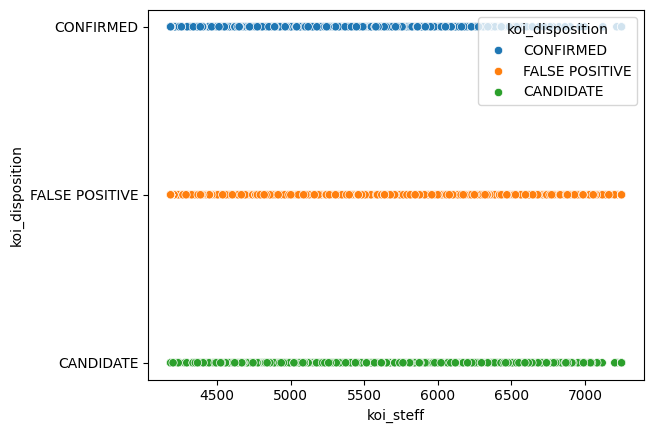

In [ ]:
sns.scatterplot(data=df, x='koi_steff', y='koi_disposition', hue='koi_disposition')
plt.show()

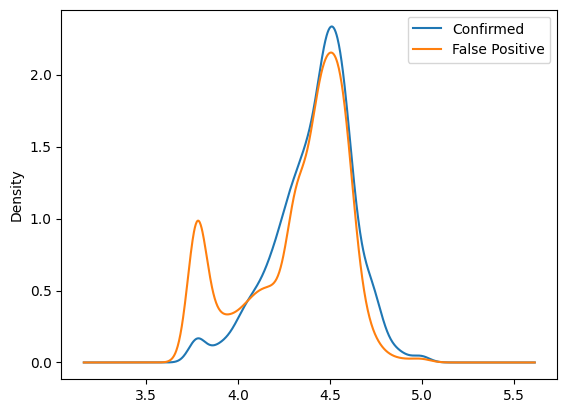

In [ ]:
df[df['koi_disposition']=='CONFIRMED']['koi_slogg'].plot(kind='kde', label='Confirmed')
df[df['koi_disposition']=='FALSE POSITIVE']['koi_slogg'].plot(kind='kde', label='False Positive')
plt.legend()
plt.show()

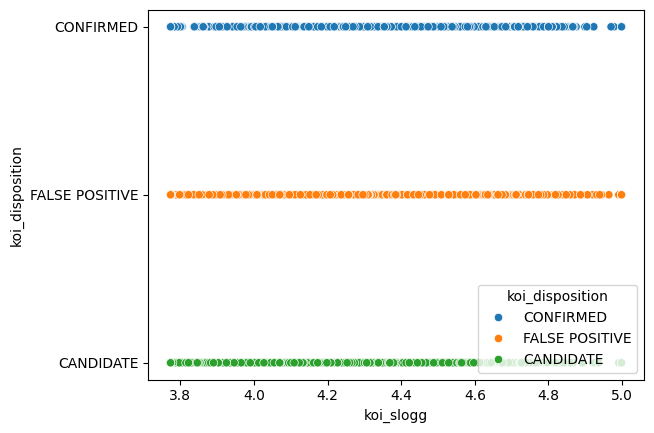

In [ ]:
sns.scatterplot(data=df, x='koi_slogg', y='koi_disposition', hue='koi_disposition')
plt.show()

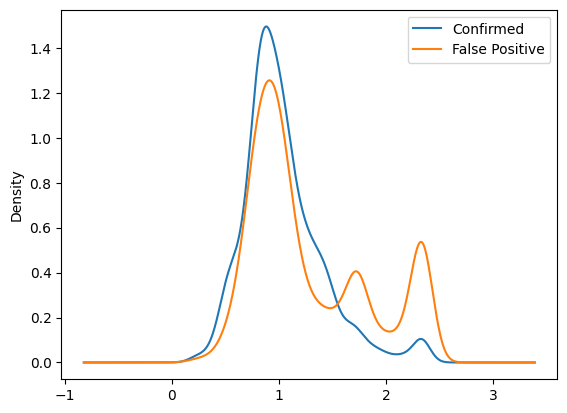

In [ ]:
df[df['koi_disposition']=='CONFIRMED']['koi_srad'].plot(kind='kde', label='Confirmed')
df[df['koi_disposition']=='FALSE POSITIVE']['koi_srad'].plot(kind='kde', label='False Positive')
plt.legend()
plt.show()

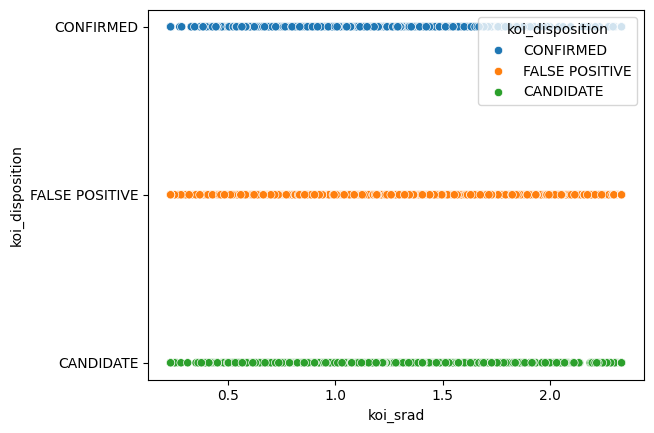

In [ ]:
sns.scatterplot(data=df, x='koi_srad', y='koi_disposition', hue='koi_disposition')
plt.show()

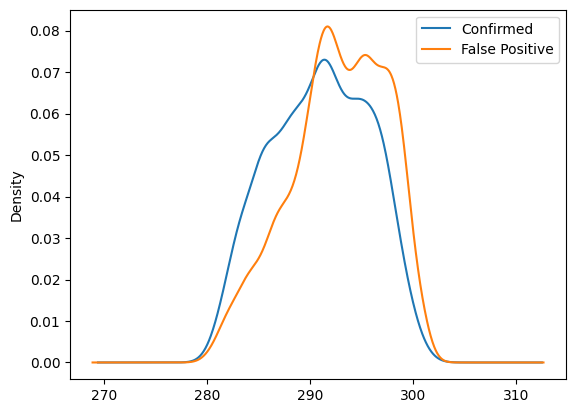

In [ ]:
df[df['koi_disposition']=='CONFIRMED']['ra'].plot(kind='kde', label='Confirmed')
df[df['koi_disposition']=='FALSE POSITIVE']['ra'].plot(kind='kde', label='False Positive')
plt.legend()
plt.show()

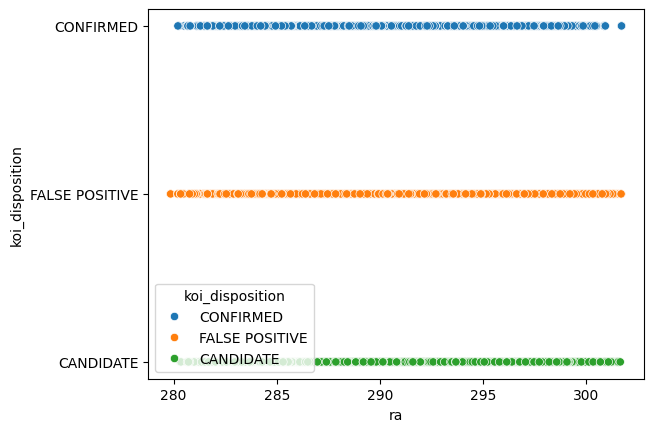

In [ ]:
sns.scatterplot(data=df, x='ra', y='koi_disposition', hue='koi_disposition')
plt.show()

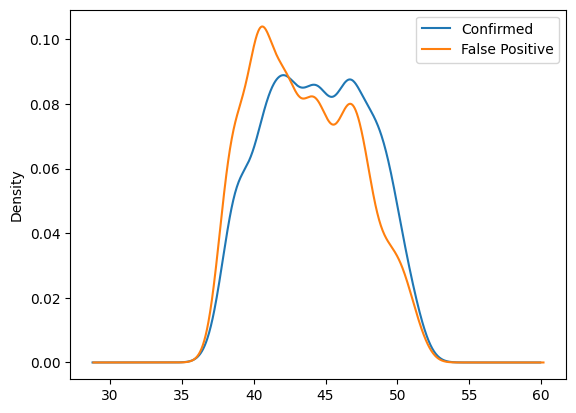

In [ ]:
df[df['koi_disposition']=='CONFIRMED']['dec'].plot(kind='kde', label='Confirmed')
df[df['koi_disposition']=='FALSE POSITIVE']['dec'].plot(kind='kde', label='False Positive')
plt.legend()
plt.show()

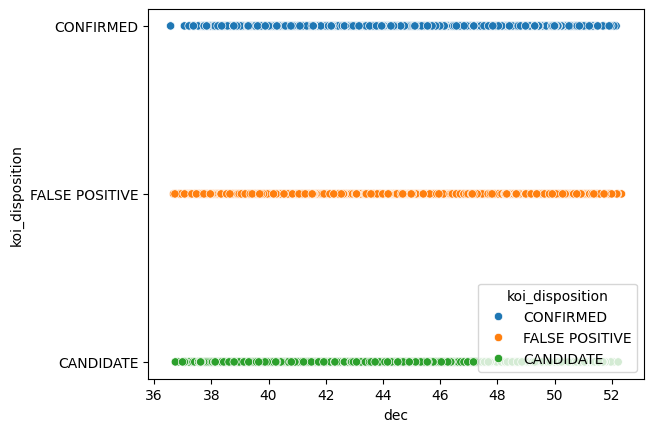

In [ ]:
sns.scatterplot(data=df, x='dec', y='koi_disposition', hue='koi_disposition')
plt.show()

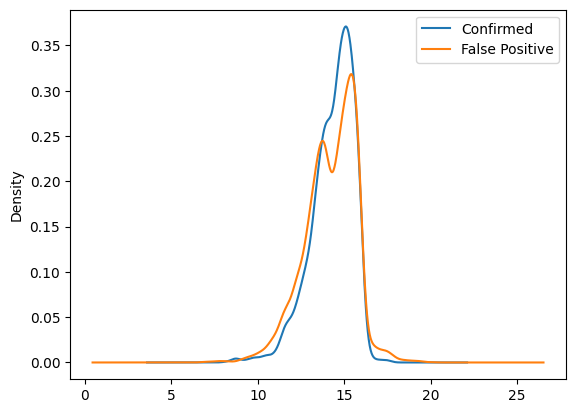

In [ ]:
df[df['koi_disposition']=='CONFIRMED']['koi_kepmag'].plot(kind='kde', label='Confirmed')
df[df['koi_disposition']=='FALSE POSITIVE']['koi_kepmag'].plot(kind='kde', label='False Positive')
plt.legend()
plt.show()

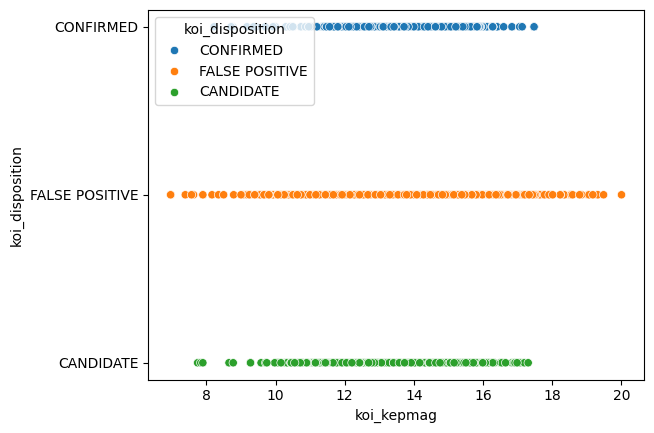

In [ ]:
sns.scatterplot(data=df, x='koi_kepmag', y='koi_disposition', hue='koi_disposition')
plt.show()

# **koi_disposition vs koi_tce_delivname**


*   more than 60% koi_tce_delivanmes have false positive as the output



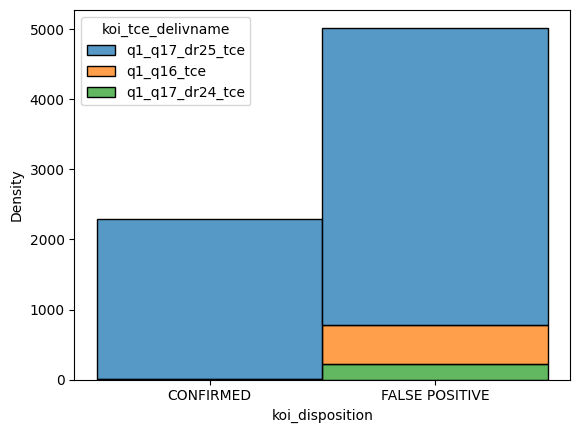

In [ ]:
df=df[(df['koi_disposition']=='CONFIRMED')|(df['koi_disposition']=='FALSE POSITIVE')]

sns.histplot(data=df,x='koi_disposition',hue='koi_tce_delivname', multiple='stack')
plt.xlabel('koi_disposition')
plt.ylabel('Density')
plt.show()

In [ ]:
pd.crosstab(df['koi_disposition'], df['koi_tce_delivname'])

koi_tce_delivname,q1_q16_tce,q1_q17_dr24_tce,q1_q17_dr25_tce
koi_disposition,,,
CONFIRMED,1,3,2289
FALSE POSITIVE,560,216,4247


In [ ]:
pd.crosstab(df['koi_disposition'], df['koi_tce_delivname'], normalize='columns')*100

koi_tce_delivname,q1_q16_tce,q1_q17_dr24_tce,q1_q17_dr25_tce
koi_disposition,,,
CONFIRMED,0.178253,1.369863,35.02142
FALSE POSITIVE,99.821747,98.630137,64.97858


# **Adding New Features**


*   Added temperature difference and semi-major-axis
*   Handled positive and negative skewness



In [116]:
df['temp_diff']=df['koi_steff']-df['koi_teq']
df['temp_diff']


,temp_diff
0,4662.0
1,5012.0
2,5215.0
3,4410.0
4,4625.0
...,...
9559,4709.0
9560,3550.0
9561,4511.0
9562,3955.0


In [117]:
df['semi_major_axis']=(df['koi_period']**2)**(1/3)
df['semi_major_axis']

,semi_major_axis
0,4.481783
1,14.360308
2,7.343271
3,1.444969
4,1.854565
...,...
9559,4.194283
9560,0.653016
9561,1.446576
9562,0.774347


In [118]:
df[num_col].skew() #Checking for skewness and creating new features

,0
koi_period,1.182274
koi_time0bk,1.376858
koi_impact,0.423760
koi_score,0.061573
koi_duration,1.046536
koi_depth,1.133837
koi_prad,1.265275
koi_teq,0.885578
koi_insol,1.199450
koi_model_snr,1.164480


In [119]:
#Log transformation for positive skewness
df['koi_period_log']=np.log1p(df['koi_period'])
df['koi_time0bk_log']=np.log1p(df['koi_time0bk'])
df['koi_duration_log']=np.log1p(df['koi_duration'])
df['koi_depth_log']=np.log1p(df['koi_depth'])
df['koi_prad_log']=np.log1p(df['koi_prad'])
df['koi_insol_log']=np.log1p(df['koi_insol'])
df['koi_model_snr_log']=np.log1p(df['koi_model_snr'])
df['koi_srad_log']=np.log1p(df['koi_srad'])

In [120]:
pt=PowerTransformer(method='box-cox')
df['koi_steff_bc']=pt.fit_transform(df['koi_steff'].values.reshape(-1,1)).flatten()
df['koi_slogg_bc']=pt.fit_transform(df['koi_slogg'].values.reshape(-1,1)).flatten()
df['ra_bc']=pt.fit_transform(df['ra'].values.reshape(-1,1)).flatten()
df['koi_kepmag_bc']=pt.fit_transform(df['koi_kepmag'].values.reshape(-1,1)).flatten() #using flatten to reshape array back to back to 1-D

In [121]:
df[err_col].skew()

,0
koi_fpflag_co,1.540689
koi_fpflag_ec,2.338618
koi_fpflag_ss,1.272691
koi_fpflag_nt,1.595610
koi_time0bk_err1,1.056879
koi_time0bk_err2,-1.056879
koi_impact_err1,1.211458
koi_impact_err2,-0.720424
koi_duration_err1,1.059732
koi_duration_err2,-1.059732


In [122]:
df['koi_fpflag_co_log']=np.log1p(df['koi_fpflag_co'])
df['koi_fpflag_ec_log']=np.log1p(df['koi_fpflag_ec'])
df['koi_fpflag_nt_log']=np.log1p(df['koi_fpflag_nt'])
df['koi_time0bk_err1_log']=np.log1p(df['koi_time0bk_err1'])
df['koi_impact_err1_log']=np.log1p(df['koi_impact_err1'])
df['koi_duration_err1_log']=np.log1p(df['koi_duration_err1'])
df['koi_depth_err1_log']=np.log1p(df['koi_depth_err1'])
df['koi_period_err1_log']=np.log1p(df['koi_period_err1'])
df['koi_prad_err1_log']=np.log1p(df['koi_prad_err1'])
df['koi_insol_err1_log']=np.log1p(df['koi_insol_err1'])
df['koi_tce_plnt_num_log']=np.log1p(df['koi_tce_plnt_num'])
df['koi_slogg_err1_log']=np.log1p(df['koi_slogg_err1'])

In [123]:
pt=PowerTransformer(method='yeo-johnson')
df['koi_time0bk_err2_yj']=pt.fit_transform(df['koi_time0bk_err2'].values.reshape(-1,1)).flatten()
df['koi_impact_err2_yj']=pt.fit_transform(df['koi_impact_err2'].values.reshape(-1,1)).flatten()
df['koi_duration_err2_yj']=pt.fit_transform(df['koi_duration_err2'].values.reshape(-1,1)).flatten()
df['koi_depth_err2_yj']=pt.fit_transform(df['koi_depth_err2'].values.reshape(-1,1)).flatten()
df['koi_period_err2_yj']=pt.fit_transform(df['koi_period_err2'].values.reshape(-1,1)).flatten()
df['koi_prad_err2_yj']=pt.fit_transform(df['koi_prad_err2'].values.reshape(-1,1)).flatten()
df['koi_insol_err2_yj']=pt.fit_transform(df['koi_insol_err2'].values.reshape(-1,1)).flatten()
df['koi_steff_err1_yj']=pt.fit_transform(df['koi_steff_err1'].values.reshape(-1,1)).flatten()
df['koi_steff_err2_yj']=pt.fit_transform(df['koi_steff_err2'].values.reshape(-1,1)).flatten()
df['koi_slogg_err2_yj']=pt.fit_transform(df['koi_slogg_err2'].values.reshape(-1,1)).flatten()
df['koi_srad_err2_yj']=pt.fit_transform(df['koi_srad_err2'].values.reshape(-1,1)).flatten()


# **One-Hot Encoding**

In [126]:
one_hot=['koi_disposition','koi_pdisposition','koi_tce_delivname']

In [129]:
df_oe=pd.get_dummies(df,columns=one_hot)
df_oe.head()

,rowid,kepid,kepoi_name,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,...,koi_steff_err2_yj,koi_slogg_err2_yj,koi_srad_err2_yj,koi_disposition_CONFIRMED,koi_disposition_FALSE POSITIVE,koi_pdisposition_CANDIDATE,koi_pdisposition_FALSE POSITIVE,koi_tce_delivname_q1_q16_tce,koi_tce_delivname_q1_q17_dr24_tce,koi_tce_delivname_q1_q17_dr25_tce
0,1,10797460,K00752.01,1.000,0,0,0,0,9.488036,2.775000e-05,...,1.423102,0.556767,0.960624,True,False,True,False,False,False,True
1,2,10797460,K00752.02,0.969,0,0,0,0,54.418383,2.479000e-04,...,1.423102,0.556767,0.960624,True,False,True,False,False,False,True
2,3,10811496,K00753.01,0.000,0,1,0,0,19.899140,1.494000e-05,...,-0.322701,-0.528396,0.728880,False,True,False,True,False,False,True
3,4,10848459,K00754.01,0.000,0,1,0,0,1.736952,2.630000e-07,...,-0.289292,-0.428449,0.876186,False,True,False,True,False,False,True
4,5,10854555,K00755.01,1.000,0,0,0,0,2.525592,3.761000e-06,...,-0.891329,-0.934295,0.116845,True,False,True,False,False,False,True


# **Train_Test_Split**

In [128]:
df=df[(df['koi_disposition']=='CONFIRMED')|(df['koi_disposition']=='FALSE POSITIVE')]


In [130]:
scaler=StandardScaler()
X=df.drop(columns=['koi_disposition','kepoi_name','koi_pdisposition','koi_tce_delivname'])
Y=df['koi_disposition']
X_s=scaler.fit_transform(X)

In [131]:
x_train,x_test,y_train,y_test=train_test_split(X_s,Y,test_size=0.3,random_state=42)

# **Performing Algorithms**

In [ ]:
print("Logistic Regression")
l_r={
    'model':LogisticRegression(),
    'param_grid':{
      'C':np.logspace(-4,4,5),
      'solver':['liblinear','lbfgs']
    }
}
model1=l_r['model']
para1=l_r['param_grid']
gs1=GridSearchCV(model1, para1, cv=5, verbose=2, n_jobs=-1)
gs1.fit(x_train,y_train)
best1=gs1.best_estimator_
best_para1=gs1.best_params_
y_pred1=best1.predict(x_test)
y_pred1

Logistic Regression
Fitting 5 folds for each of 10 candidates, totalling 50 fits


array(['CONFIRMED', 'CONFIRMED', 'FALSE POSITIVE', ..., 'CONFIRMED',
       'FALSE POSITIVE', 'FALSE POSITIVE'], dtype=object)

In [ ]:
print("Support Vector Machine")
svm={
    'model':SVC(),
    'param_grid':{
      'C':np.logspace(-4,4,5),
      'kernel':['linear','rbf']
    }
}
model2=svm['model']
para2=svm['param_grid']
gs2=GridSearchCV(model2, para2, cv=5, verbose=2, n_jobs=-1)
gs2.fit(x_train,y_train)
best2=gs2.best_estimator_
best_para2=gs2.best_params_
y_pred2=best2.predict(x_test)
y_pred2

Support Vector Machine
Fitting 5 folds for each of 10 candidates, totalling 50 fits


array(['CONFIRMED', 'CONFIRMED', 'FALSE POSITIVE', ..., 'CONFIRMED',
       'FALSE POSITIVE', 'FALSE POSITIVE'], dtype=object)

In [ ]:
print("Random Forest")
rf=RandomForestClassifier()
param_grid={
      'n_estimators':[100,200,300],
      'max_depth':[5,10,15]
}

model3=rf
gs3=GridSearchCV(estimator=model3, param_grid=param_grid, cv=5, verbose=2, n_jobs=-1)
gs3.fit(x_train,y_train)
best3=gs3.best_estimator_
best_para3=gs3.best_params_
y_pred3=best3.predict(x_test)
y_pred3

Random Forest
Fitting 5 folds for each of 9 candidates, totalling 45 fits


array(['CONFIRMED', 'CONFIRMED', 'FALSE POSITIVE', ..., 'CONFIRMED',
       'FALSE POSITIVE', 'FALSE POSITIVE'], dtype=object)

In [ ]:
print("Naive-Bayes")
nb=GaussianNB()
param_grid={}
model4=nb
gs4=GridSearchCV(estimator=model4,param_grid=param_grid,cv=5, verbose=2, n_jobs=-1)
gs4.fit(x_train,y_train)
best4=gs4.best_estimator_
best_para4=gs4.best_params_
y_pred4=best4.predict(x_test)
y_pred4

Naive-Bayes
Fitting 5 folds for each of 1 candidates, totalling 5 fits


array(['CONFIRMED', 'CONFIRMED', 'FALSE POSITIVE', ..., 'CONFIRMED',
       'FALSE POSITIVE', 'FALSE POSITIVE'], dtype='<U14')

# **Testing accuracy, f1score, recall, and confusion matrix for the above algorithms**



*   Most of the scores are above 95%



Testing for Logistics Regression
********************
Accuracy_1
0.9908883826879271
********************
Precision_1
0.9889655172413793
********************
Recall_1
0.9835390946502057
********************
F1_score
0.9862448418156808
********************
Confusion MAtrix


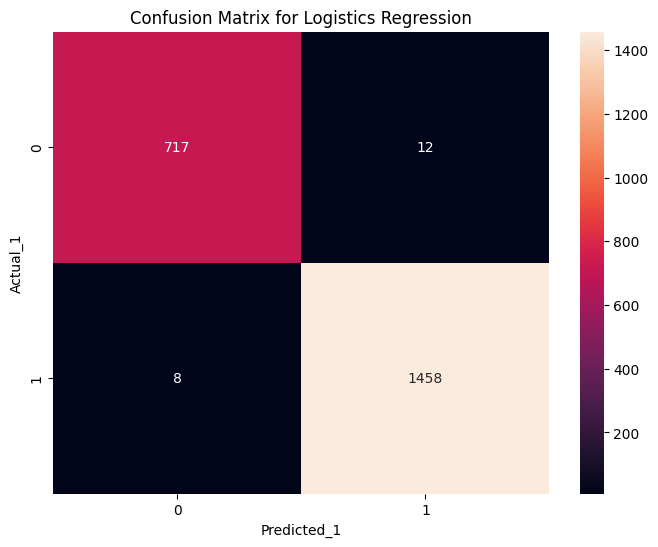

In [ ]:
print("Testing for Logistics Regression")
print('*'*20)
print("Accuracy_1")
print(accuracy_score(y_test, y_pred1))
print('*'*20)
print("Precision_1")
print(precision_score(y_test, y_pred1, pos_label='CONFIRMED'))
print('*'*20)
print("Recall_1")
print(recall_score(y_test, y_pred1, pos_label='CONFIRMED'))
print('*'*20)
print("F1_score")
print(f1_score(y_test, y_pred1, pos_label='CONFIRMED'))
print('*'*20)
print("Confusion MAtrix")
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test,y_pred1), annot=True, fmt='d')
plt.xlabel('Predicted_1')
plt.ylabel('Actual_1')
plt.title('Confusion Matrix for Logistics Regression')
plt.show()



Testing for Support Vector Machine
********************
Accuracy_2
0.9913439635535307
********************
Precision_2
0.9958100558659218
********************
Recall_2
0.9780521262002744
********************
F1_score
0.9868512110726644
********************
Confusion MAtrix


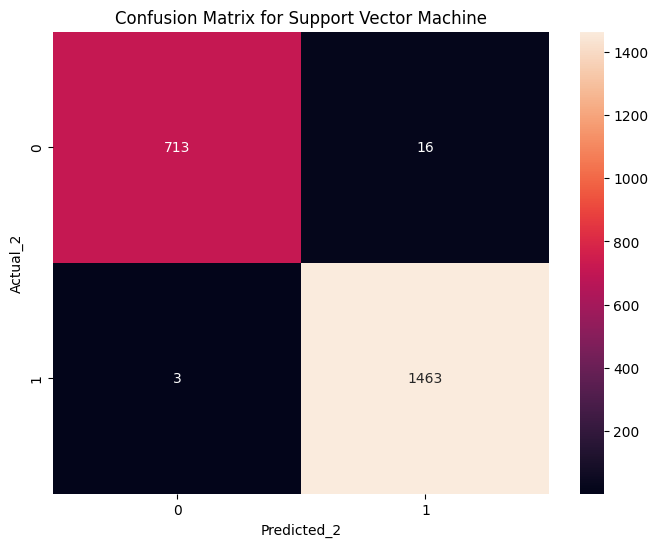

In [ ]:
print("Testing for Support Vector Machine")
print('*'*20)
print("Accuracy_2")
print(accuracy_score(y_test, y_pred2))
print('*'*20)
print("Precision_2")
print(precision_score(y_test, y_pred2, pos_label='CONFIRMED'))
print('*'*20)
print("Recall_2")
print(recall_score(y_test, y_pred2, pos_label='CONFIRMED'))
print('*'*20)
print("F1_score")
print(f1_score(y_test, y_pred2, pos_label='CONFIRMED'))
print('*'*20)
print("Confusion MAtrix")
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test,y_pred2), annot=True, fmt='d')
plt.xlabel('Predicted_2')
plt.ylabel('Actual_2')
plt.title('Confusion Matrix for Support Vector Machine')
plt.show()

Testing for Random Forest
********************
Accuracy_3
0.9904328018223235
********************
Precision_3
0.9985915492957746
********************
Recall_3
0.9725651577503429
********************
F1_score
0.985406532314107
********************
Confusion MAtrix


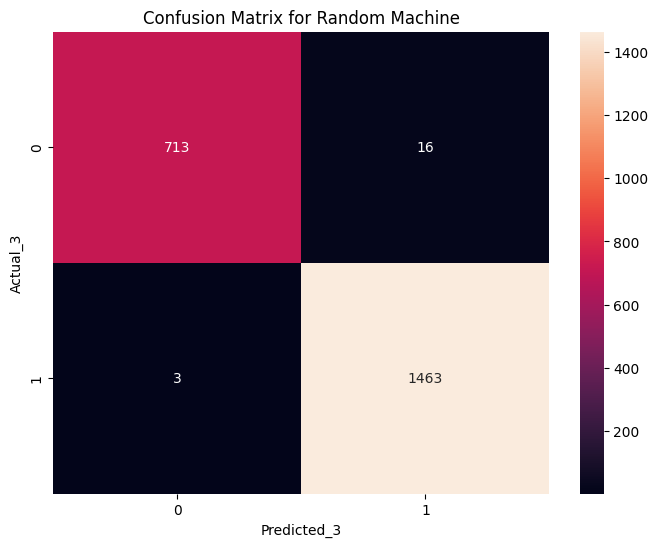

In [ ]:
print("Testing for Random Forest")
print('*'*20)
print("Accuracy_3")
print(accuracy_score(y_test, y_pred3))
print('*'*20)
print("Precision_3")
print(precision_score(y_test, y_pred3, pos_label='CONFIRMED'))
print('*'*20)
print("Recall_3")
print(recall_score(y_test, y_pred3, pos_label='CONFIRMED'))
print('*'*20)
print("F1_score")
print(f1_score(y_test, y_pred3, pos_label='CONFIRMED'))
print('*'*20)
print("Confusion MAtrix")
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test,y_pred2), annot=True, fmt='d')
plt.xlabel('Predicted_3')
plt.ylabel('Actual_3')
plt.title('Confusion Matrix for Random Machine')
plt.show()

Testing for Naive-Bayes
********************
Accuracy_4
0.9822323462414578
********************
Precision_4
0.9956896551724138
********************
Recall_4
0.9506172839506173
********************
F1_score
0.9726315789473684
********************
Confusion MAtrix


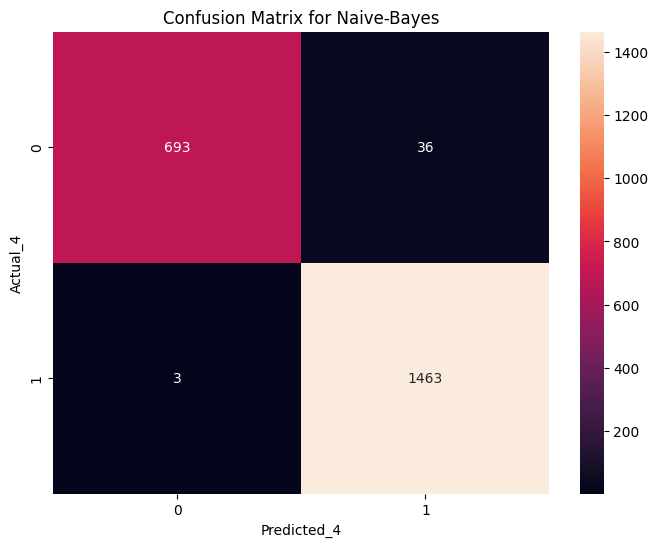

In [ ]:
print("Testing for Naive-Bayes")
print('*'*20)
print("Accuracy_4")
print(accuracy_score(y_test, y_pred4))
print('*'*20)
print("Precision_4")
print(precision_score(y_test, y_pred4, pos_label='CONFIRMED'))
print('*'*20)
print("Recall_4")
print(recall_score(y_test, y_pred4, pos_label='CONFIRMED'))
print('*'*20)
print("F1_score")
print(f1_score(y_test, y_pred4, pos_label='CONFIRMED'))
print('*'*20)
print("Confusion MAtrix")
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test,y_pred4), annot=True, fmt='d')
plt.xlabel('Predicted_4')
plt.ylabel('Actual_4')
plt.title('Confusion Matrix for Naive-Bayes')
plt.show()